In [1]:
from dataset import Dataset
from train import Trainer
from config import config
import warnings
warnings.filterwarnings('ignore')

print("Parameters defined in config.py:")
for par, val in config.items():
    if not type(config[par]) == type(config):
        print('    {:<30}   {:}'.format(par,val))

print("PSF related: ")
for par, val in config.PSF.items():
    print('    {:<30}   {:<30}'.format(par,val))
    
print("Training related: ")
for par, val in config.TRAIN.items():
    print('    {:<30}   {:<30}'.format(par,val))

ImportError: __init__.py : Could not import TensorFlow.Please make sure you install a recent enough version of TensorFlow.

In [2]:
import numpy as np

img_size         = config.img_size * np.array(config.size_factor) 
n_num            = config.PSF.Nnum
base_size        = img_size // n_num # lateral size of lf_extra
training_dataset = Dataset(config.TRAIN.target3d_path, config.TRAIN.lf2d_path, config.PSF.n_slices, 
                           config.PSF.Nnum, base_size, normalize_mode='max')

NameError: name 'config' is not defined

In [3]:
use_cpu = False # set to False if a CUDA enabled GPU is available. Note: GPU is not supported in current code ocean environment

trainer  = Trainer(training_dataset)
trainer.build_graph(use_cpu)

[TL] InputLayer  vcdnet/lf_extra: (3, 16, 16, 121)
[TL] Conv2dLayer vcdnet/conv1: shape:(7, 7, 121, 128) strides:(1, 1, 1, 1) pad:SAME act:identity


[TL] SubpixelConv2d  interp/subpixel0: scale: 2 n_out_channel: 32 act: identity


[TL] Conv2dLayer vcdnet/interp/conv0: shape:(3, 3, 32, 64) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] SubpixelConv2d  interp/subpixel1: scale: 2 n_out_channel: 16 act: identity
[TL] Conv2dLayer vcdnet/interp/conv1: shape:(3, 3, 16, 32) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] SubpixelConv2d  interp/subpixel2: scale: 2 n_out_channel: 8 act: identity
[TL] Conv2dLayer vcdnet/interp/conv2: shape:(3, 3, 8, 16) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] SubpixelConv2d  interp/subpixel3: scale: 2 n_out_channel: 4 act: identity
[TL] Conv2dLayer vcdnet/interp/conv3: shape:(3, 3, 4, 8) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] Conv2dLayer vcdnet/interp/conv_final: shape:(3, 3, 8, 8) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer vcdnet/interp/bn_final: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] Conv2dLayer vcdnet/encoder/conv0: shape:(3, 3, 8, 64) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer vcdnet/encoder/bn_0: decay:

encoder 0 : (3, 256, 256, 64)
(3, 256, 256, 64)
(3, 256, 256, 64) (3, 256, 256, 64)
encoder 1 : (3, 128, 128, 128)
(3, 128, 128, 128)
(3, 128, 128, 128) (3, 128, 128, 128)
encoder 2 : (3, 64, 64, 256)


[TL] ElementwiseLayer vcdnet/encoder/add3: size:(3, 64, 64, 512) fn:add
[TL] PoolLayer   vcdnet/encoder/maxplool3: ksize:[1, 3, 3, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
[TL] Conv2dLayer vcdnet/encoder/conv4: shape:(3, 3, 512, 512) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer vcdnet/encoder/bn4: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] ElementwiseLayer vcdnet/encoder/add4: size:(3, 32, 32, 512) fn:add
[TL] PoolLayer   vcdnet/encoder/maxplool4: ksize:[1, 3, 3, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
[TL] Conv2dLayer vcdnet/encoder/conv5: shape:(3, 3, 512, 512) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer vcdnet/encoder/bn5: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] ElementwiseLayer vcdnet/encoder/add5: size:(3, 16, 16, 512) fn:add
[TL] PoolLayer   vcdnet/encoder/maxplool5: ksize:[1, 3, 3, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
[TL] UpSampling2dLayer upsamplimg: is_scale:Fa

(3, 64, 64, 256)
(3, 64, 64, 256) (3, 64, 64, 256)
encoder 3 : (3, 32, 32, 512)
(3, 32, 32, 512)
(3, 32, 32, 512) (3, 32, 32, 0)
encoder 4 : (3, 16, 16, 512)
(3, 16, 16, 512)
(3, 16, 16, 512) (3, 16, 16, 0)



[TL] ConcatLayer vcdnet/decoder/concat1: axis: -1
[TL] Conv2dLayer vcdnet/decoder/conv2: shape:(3, 3, 1024, 512) strides:(1, 1, 1, 1) pad:SAME act:identity


decoder 4 : (3, 16, 16, 512)


[TL] BatchNormLayer vcdnet/decoder/bn2: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] UpSampling2dLayer upsamplimg2: is_scale:False size:(32, 32) method:0 align_corners:False
[TL] ConcatLayer vcdnet/decoder/concat2: axis: -1
[TL] Conv2dLayer vcdnet/decoder/conv3: shape:(3, 3, 1024, 512) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer vcdnet/decoder/bn3: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] UpSampling2dLayer upsamplimg3: is_scale:False size:(64, 64) method:0 align_corners:False
[TL] ConcatLayer vcdnet/decoder/concat3: axis: -1
[TL] Conv2dLayer vcdnet/decoder/conv4: shape:(3, 3, 768, 256) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer vcdnet/decoder/bn4: decay:0.900000 epsilon:0.000010 act:identity is_train:True


decoder 3 : (3, 32, 32, 512)
decoder 2 : (3, 64, 64, 512)


[TL] UpSampling2dLayer upsamplimg4: is_scale:False size:(128, 128) method:0 align_corners:False
[TL] ConcatLayer vcdnet/decoder/concat4: axis: -1
[TL] Conv2dLayer vcdnet/decoder/conv5: shape:(3, 3, 384, 128) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer vcdnet/decoder/bn5: decay:0.900000 epsilon:0.000010 act:identity is_train:True


decoder 1 : (3, 128, 128, 256)


[TL] UpSampling2dLayer upsamplimg5: is_scale:False size:(256, 256) method:0 align_corners:False
[TL] ConcatLayer vcdnet/decoder/concat5: axis: -1
[TL] Conv2dLayer vcdnet/decoder/conv6: shape:(3, 3, 192, 31) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer vcdnet/decoder/bn6: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] UpSampling2dLayer upsamplimg6: is_scale:False size:(256, 256) method:0 align_corners:False
[TL] UpSampling2dLayer resize_final: is_scale:False size:[176 176] method:0 align_corners:False
[TL]   param   0: vcdnet/conv1/W_conv2d:0 (7, 7, 121, 128)    float32_ref
[TL]   param   1: vcdnet/interp/conv0/W_conv2d:0 (3, 3, 32, 64)     float32_ref
[TL]   param   2: vcdnet/interp/conv1/W_conv2d:0 (3, 3, 16, 32)     float32_ref
[TL]   param   3: vcdnet/interp/conv2/W_conv2d:0 (3, 3, 8, 16)      float32_ref
[TL]   param   4: vcdnet/interp/conv3/W_conv2d:0 (3, 3, 4, 8)       float32_ref
[TL]   param   5: vcdnet/interp/conv_final/W_conv2d:0 (3, 3, 8, 8

decoder 0 : (3, 256, 256, 128)


[TL]   param  41: vcdnet/decoder/bn2/beta:0 (512,)             float32_ref
[TL]   param  42: vcdnet/decoder/bn2/gamma:0 (512,)             float32_ref
[TL]   param  43: vcdnet/decoder/bn2/moving_mean:0 (512,)             float32_ref
[TL]   param  44: vcdnet/decoder/bn2/moving_variance:0 (512,)             float32_ref
[TL]   param  45: vcdnet/decoder/conv3/W_conv2d:0 (3, 3, 1024, 512)    float32_ref
[TL]   param  46: vcdnet/decoder/bn3/beta:0 (512,)             float32_ref
[TL]   param  47: vcdnet/decoder/bn3/gamma:0 (512,)             float32_ref
[TL]   param  48: vcdnet/decoder/bn3/moving_mean:0 (512,)             float32_ref
[TL]   param  49: vcdnet/decoder/bn3/moving_variance:0 (512,)             float32_ref
[TL]   param  50: vcdnet/decoder/conv4/W_conv2d:0 (3, 3, 768, 256)    float32_ref
[TL]   param  51: vcdnet/decoder/bn4/beta:0 (256,)             float32_ref
[TL]   param  52: vcdnet/decoder/bn4/gamma:0 (256,)             float32_ref
[TL]   param  53: vcdnet/decoder/bn4/moving_me

[TL]   got   0: vcdnet/conv1/W_conv2d:0   (7, 7, 121, 128)
[TL]   got   1: vcdnet/interp/conv0/W_conv2d:0   (3, 3, 32, 64)
[TL]   got   2: vcdnet/interp/conv1/W_conv2d:0   (3, 3, 16, 32)
[TL]   got   3: vcdnet/interp/conv2/W_conv2d:0   (3, 3, 8, 16)
[TL]   got   4: vcdnet/interp/conv3/W_conv2d:0   (3, 3, 4, 8)
[TL]   got   5: vcdnet/interp/conv_final/W_conv2d:0   (3, 3, 8, 8)
[TL]   got   6: vcdnet/interp/bn_final/beta:0   (8,)
[TL]   got   7: vcdnet/interp/bn_final/gamma:0   (8,)
[TL]   got   8: vcdnet/encoder/conv0/W_conv2d:0   (3, 3, 8, 64)
[TL]   got   9: vcdnet/encoder/bn_0/beta:0   (64,)
[TL]   got  10: vcdnet/encoder/bn_0/gamma:0   (64,)
[TL]   got  11: vcdnet/encoder/conv1/W_conv2d:0   (3, 3, 64, 128)
[TL]   got  12: vcdnet/encoder/bn1/beta:0   (128,)
[TL]   got  13: vcdnet/encoder/bn1/gamma:0   (128,)
[TL]   got  14: vcdnet/encoder/conv2/W_conv2d:0   (3, 3, 128, 256)
[TL]   got  15: vcdnet/encoder/bn2/beta:0   (256,)
[TL]   got  16: vcdnet/encoder/bn2/gamma:0   (256,)
[TL]   g

[TL] [!] F:/VCD-Net-main/vcdnet/sample/test/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust/ exists ...
[TL] [!] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust/ exists ...
[TL] [!] ./log/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust/ exists ...




259-000041.tif : (176, 176, 31)
259-000041.tif : (16, 16, 121)
HR dataset : (6502, 176, 176, 31)
LF dataset: (6502, 16, 16, 121)



Epoch:[0/60] iter:[2022/5852] time: 0.191s, {'ln_loss': 0.38880786}ln_loss': 0.46492156}{'ln_loss': 0.6327305}{'ln_loss': 0.67241585}{'ln_loss': 0.47622126}{'ln_loss': 0.57949084}{'ln_loss': 0.5417892}{'ln_loss': 0.5328226}{'ln_loss': 0.5557857}{'ln_loss': 0.47902673}{'ln_loss': 0.5663604}{'ln_loss': 0.55174804}{'ln_loss': 0.50952595}{'ln_loss': 0.49745524}{'ln_loss': 0.522072}{'ln_loss': 0.51482207}{'ln_loss': 0.59151894}{'ln_loss': 0.5463249}{'ln_loss': 0.5135583}{'ln_loss': 0.56925005}{'ln_loss': 0.5208756}{'ln_loss': 0.5341096}{'ln_loss': 0.5646071}{'ln_loss': 0.4939214}{'ln_loss': 0.5892068}{'ln_loss': 0.53783286}{'ln_loss': 0.5255151}{'ln_loss': 0.42726406}{'ln_loss': 0.51756483}{'ln_loss': 0.54976827}{'ln_loss': 0.4600184}{'ln_loss': 0.41493028}{'ln_loss': 0.53021306}{'ln_loss': 0.5340863}{'ln_loss': 0.4885503}{'ln_loss': 0.46805662}{'ln_loss': 0.5093284}{'ln_loss': 0.37860334}{'ln_loss': 0.47529548}{'ln_loss': 0.5363857}{'ln_loss': 0.47511593}{'ln_loss': 0.52414286}{'ln_loss': 

Epoch:[0/60] iter:[5844/5852] time: 0.193s, {'ln_loss': 0.23067068}{'ln_loss': 0.25735837}{'ln_loss': 0.26709953}{'ln_loss': 0.22115302}{'ln_loss': 0.25866318}{'ln_loss': 0.25819927}{'ln_loss': 0.22127844}{'ln_loss': 0.29272532}{'ln_loss': 0.31041226}{'ln_loss': 0.22422583}{'ln_loss': 0.27603903}
validation [ 645/ 650] loss = 0.287949   avg = 0.250457 best = 10000000000.000000 (@epoch0)


[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[1/60] iter:[2427/5852] time: 0.187s, {'ln_loss': 0.19469693}}{'ln_loss': 0.2546434}{'ln_loss': 0.18455036}{'ln_loss': 0.16690443}{'ln_loss': 0.24436161}{'ln_loss': 0.2903914}{'ln_loss': 0.19063029}{'ln_loss': 0.25443178}{'ln_loss': 0.22214231}{'ln_loss': 0.2575643}{'ln_loss': 0.18941706}{'ln_loss': 0.2659747}{'ln_loss': 0.268887}{'ln_loss': 0.2855452}{'ln_loss': 0.26456448}{'ln_loss': 0.24976337}{'ln_loss': 0.24813089}{'ln_loss': 0.25183693}{'ln_loss': 0.26428884}{'ln_loss': 0.2824753}{'ln_loss': 0.1808993}{'ln_loss': 0.2203888}{'ln_loss': 0.19663337}{'ln_loss': 0.27059013}{'ln_loss': 0.26823968}{'ln_loss': 0.28539658}{'ln_loss': 0.2669613}{'ln_loss': 0.25653082}{'ln_loss': 0.30609208}{'ln_loss': 0.213085}{'ln_loss': 0.2482117}{'ln_loss': 0.21116786}{'ln_loss': 0.22116172}{'ln_loss': 0.20701417}{'ln_loss': 0.25349826}{'ln_loss': 0.25810432}{'ln_loss': 0.22209965}{'ln_loss': 0.27753258}{'ln_loss': 0.25822476}{'ln_loss': 0.27107492}{'ln_loss': 0.2748911}{'ln_loss': 0.19834378}{'ln

Epoch:[1/60] iter:[5091/5852] time: 0.191s, {'ln_loss': 0.15978782}}'ln_loss': 0.23672672}{'ln_loss': 0.20926249}{'ln_loss': 0.16754222}{'ln_loss': 0.19120975}{'ln_loss': 0.20758015}{'ln_loss': 0.21606612}{'ln_loss': 0.15669018}{'ln_loss': 0.22143522}{'ln_loss': 0.19512488}{'ln_loss': 0.23292252}{'ln_loss': 0.2258102}{'ln_loss': 0.19013664}{'ln_loss': 0.20046963}{'ln_loss': 0.2223027}{'ln_loss': 0.20572333}{'ln_loss': 0.16317055}{'ln_loss': 0.22899082}{'ln_loss': 0.15139437}{'ln_loss': 0.21941142}{'ln_loss': 0.2332161}{'ln_loss': 0.2059456}{'ln_loss': 0.17464344}{'ln_loss': 0.21694794}{'ln_loss': 0.23409303}{'ln_loss': 0.17137659}{'ln_loss': 0.1858236}{'ln_loss': 0.11410821}{'ln_loss': 0.19285393}{'ln_loss': 0.16973163}{'ln_loss': 0.14744356}{'ln_loss': 0.21452099}{'ln_loss': 0.19379285}{'ln_loss': 0.15578099}{'ln_loss': 0.17273152}{'ln_loss': 0.19828321}{'ln_loss': 0.19933599}{'ln_loss': 0.20013611}{'ln_loss': 0.21177298}{'ln_loss': 0.21409267}{'ln_loss': 0.20718572}{'ln_loss': 0.2025

Epoch:[1/60] iter:[5844/5852] time: 0.193s, {'ln_loss': 0.11531133}}'ln_loss': 0.15843408}{'ln_loss': 0.17292432}{'ln_loss': 0.16414124}{'ln_loss': 0.13954486}{'ln_loss': 0.13268833}{'ln_loss': 0.14888868}{'ln_loss': 0.06846707}{'ln_loss': 0.1664096}{'ln_loss': 0.13112958}{'ln_loss': 0.14270774}{'ln_loss': 0.16305599}{'ln_loss': 0.11524367}{'ln_loss': 0.1364758}{'ln_loss': 0.16789974}{'ln_loss': 0.17874165}{'ln_loss': 0.18206252}{'ln_loss': 0.16707811}{'ln_loss': 0.16432486}{'ln_loss': 0.18809076}{'ln_loss': 0.16826637}{'ln_loss': 0.12231002}{'ln_loss': 0.17370918}{'ln_loss': 0.14377715}{'ln_loss': 0.14730829}{'ln_loss': 0.15810215}{'ln_loss': 0.15317617}{'ln_loss': 0.12206541}{'ln_loss': 0.15055484}{'ln_loss': 0.16877878}{'ln_loss': 0.14923313}{'ln_loss': 0.12202853}{'ln_loss': 0.15642309}{'ln_loss': 0.12985161}{'ln_loss': 0.16933426}{'ln_loss': 0.14779153}{'ln_loss': 0.11962299}{'ln_loss': 0.16517067}{'ln_loss': 0.11985354}{'ln_loss': 0.1082885}{'ln_loss': 0.15440041}{'ln_loss': 0.13

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[2/60] iter:[3243/5852] time: 0.188s, {'ln_loss': 0.1224837}4}{'ln_loss': 0.1668716}{'ln_loss': 0.10277832}{'ln_loss': 0.10774991}{'ln_loss': 0.14756297}{'ln_loss': 0.1690489}{'ln_loss': 0.15692055}{'ln_loss': 0.17123428}{'ln_loss': 0.15579756}{'ln_loss': 0.17031008}{'ln_loss': 0.13454248}{'ln_loss': 0.17845805}{'ln_loss': 0.15764718}{'ln_loss': 0.15840505}{'ln_loss': 0.16472349}{'ln_loss': 0.11036919}{'ln_loss': 0.1589038}{'ln_loss': 0.15665025}{'ln_loss': 0.16967177}{'ln_loss': 0.15591593}{'ln_loss': 0.119849846}{'ln_loss': 0.13402453}{'ln_loss': 0.14859526}{'ln_loss': 0.08701607}{'ln_loss': 0.14873028}{'ln_loss': 0.13456984}{'ln_loss': 0.1528687}{'ln_loss': 0.1886958}{'ln_loss': 0.12036507}{'ln_loss': 0.15813386}{'ln_loss': 0.116963945}{'ln_loss': 0.12335035}{'ln_loss': 0.12362402}{'ln_loss': 0.1366749}{'ln_loss': 0.11947107}{'ln_loss': 0.14847101}{'ln_loss': 0.14738771}{'ln_loss': 0.16410296}{'ln_loss': 0.14900228}{'ln_loss': 0.15340328}{'ln_loss': 0.15886019}{'ln_loss': 0.15

Epoch:[2/60] iter:[5844/5852] time: 0.189s, {'ln_loss': 0.07148117}}{'ln_loss': 0.11175938}{'ln_loss': 0.12597227}{'ln_loss': 0.11652345}{'ln_loss': 0.12722655}{'ln_loss': 0.099436134}{'ln_loss': 0.12639856}{'ln_loss': 0.11566511}{'ln_loss': 0.11861633}{'ln_loss': 0.13496652}{'ln_loss': 0.10521041}{'ln_loss': 0.1250578}{'ln_loss': 0.107328996}{'ln_loss': 0.13021582}{'ln_loss': 0.107085876}{'ln_loss': 0.1133669}{'ln_loss': 0.10716141}{'ln_loss': 0.121461056}{'ln_loss': 0.06661918}{'ln_loss': 0.11767628}{'ln_loss': 0.09167464}{'ln_loss': 0.07307897}{'ln_loss': 0.10794953}{'ln_loss': 0.1277492}{'ln_loss': 0.07219769}{'ln_loss': 0.10959828}{'ln_loss': 0.09893486}{'ln_loss': 0.10211104}{'ln_loss': 0.094826624}{'ln_loss': 0.100515254}{'ln_loss': 0.13265349}{'ln_loss': 0.08759207}{'ln_loss': 0.105798535}{'ln_loss': 0.10682901}{'ln_loss': 0.11017666}{'ln_loss': 0.10831428}{'ln_loss': 0.11416305}{'ln_loss': 0.09843592}{'ln_loss': 0.111343354}{'ln_loss': 0.11045607}{'ln_loss': 0.11938971}{'ln_lo

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[3/60] iter:[5025/5852] time: 0.188s, {'ln_loss': 0.05127221}}}{'ln_loss': 0.10251948}{'ln_loss': 0.05108581}{'ln_loss': 0.044708498}{'ln_loss': 0.057569776}{'ln_loss': 0.0827773}{'ln_loss': 0.067906}{'ln_loss': 0.08924906}{'ln_loss': 0.074717924}{'ln_loss': 0.07059777}{'ln_loss': 0.08118133}{'ln_loss': 0.08166432}{'ln_loss': 0.07443961}{'ln_loss': 0.09924795}{'ln_loss': 0.08208863}{'ln_loss': 0.086249255}{'ln_loss': 0.09656023}{'ln_loss': 0.07386613}{'ln_loss': 0.10479552}{'ln_loss': 0.093927525}{'ln_loss': 0.06820158}{'ln_loss': 0.057368796}{'ln_loss': 0.07966157}{'ln_loss': 0.07478686}{'ln_loss': 0.08850577}{'ln_loss': 0.09808023}{'ln_loss': 0.08897291}{'ln_loss': 0.08010584}{'ln_loss': 0.08806585}{'ln_loss': 0.07316062}{'ln_loss': 0.06422986}{'ln_loss': 0.07964708}{'ln_loss': 0.1018102}{'ln_loss': 0.0768706}{'ln_loss': 0.066709325}{'ln_loss': 0.06819605}{'ln_loss': 0.09213979}{'ln_loss': 0.09577719}{'ln_loss': 0.05946703}{'ln_loss': 0.09105302}{'ln_loss': 0.09046892}{'ln_loss

Epoch:[3/60] iter:[5844/5852] time: 0.187s, {'ln_loss': 0.037933953}{'ln_loss': 0.054161083}{'ln_loss': 0.05224407}{'ln_loss': 0.041955136}{'ln_loss': 0.051050264}{'ln_loss': 0.036561683}{'ln_loss': 0.04884818}{'ln_loss': 0.06110228}{'ln_loss': 0.05613067}{'ln_loss': 0.035488058}{'ln_loss': 0.044180427}{'ln_loss': 0.017587084}{'ln_loss': 0.034737397}{'ln_loss': 0.048899762}{'ln_loss': 0.050824903}{'ln_loss': 0.062343787}{'ln_loss': 0.048185315}{'ln_loss': 0.035526134}{'ln_loss': 0.033615917}{'ln_loss': 0.037619546}{'ln_loss': 0.04907624}{'ln_loss': 0.046812184}{'ln_loss': 0.04703021}{'ln_loss': 0.052051418}{'ln_loss': 0.04084458}{'ln_loss': 0.02991525}{'ln_loss': 0.046376035}{'ln_loss': 0.057070192}{'ln_loss': 0.05479989}{'ln_loss': 0.048832394}{'ln_loss': 0.059051435}{'ln_loss': 0.050952286}{'ln_loss': 0.039580595}{'ln_loss': 0.047135893}{'ln_loss': 0.059538435}{'ln_loss': 0.04974539}{'ln_loss': 0.052979898}{'ln_loss': 0.035628855}{'ln_loss': 0.048081752}{'ln_loss': 0.031016314}{'ln_l

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[4/60] iter:[3573/5852] time: 0.203s, {'ln_loss': 0.02981866}}}{'ln_loss': 0.023590546}{'ln_loss': 0.032471765}{'ln_loss': 0.046951395}{'ln_loss': 0.03698714}{'ln_loss': 0.054366037}{'ln_loss': 0.04084878}{'ln_loss': 0.048190664}{'ln_loss': 0.048794065}{'ln_loss': 0.04411472}{'ln_loss': 0.052949753}{'ln_loss': 0.049723253}{'ln_loss': 0.04364592}{'ln_loss': 0.05299711}{'ln_loss': 0.04435064}{'ln_loss': 0.04157891}{'ln_loss': 0.03506311}{'ln_loss': 0.05000674}{'ln_loss': 0.048479814}{'ln_loss': 0.03312384}{'ln_loss': 0.0408017}{'ln_loss': 0.04199595}{'ln_loss': 0.043485098}{'ln_loss': 0.049300767}{'ln_loss': 0.05994473}{'ln_loss': 0.03975729}{'ln_loss': 0.035419274}{'ln_loss': 0.033054523}{'ln_loss': 0.029860318}{'ln_loss': 0.031730708}{'ln_loss': 0.032721978}{'ln_loss': 0.045377977}{'ln_loss': 0.05069125}{'ln_loss': 0.045496352}{'ln_loss': 0.031544983}{'ln_loss': 0.032015618}{'ln_loss': 0.043932226}{'ln_loss': 0.05151703}{'ln_loss': 0.040388808}{'ln_loss': 0.038582414}{'ln_loss': 

Epoch:[4/60] iter:[5844/5852] time: 0.187s, {'ln_loss': 0.0204452}9}}'ln_loss': 0.027983572}{'ln_loss': 0.03240329}{'ln_loss': 0.035348576}{'ln_loss': 0.03725173}{'ln_loss': 0.025173848}{'ln_loss': 0.027751846}{'ln_loss': 0.031115405}{'ln_loss': 0.018623212}{'ln_loss': 0.019835645}{'ln_loss': 0.022794787}{'ln_loss': 0.037391346}{'ln_loss': 0.040926658}{'ln_loss': 0.026361091}{'ln_loss': 0.025445327}{'ln_loss': 0.03259565}{'ln_loss': 0.02195488}{'ln_loss': 0.03440835}{'ln_loss': 0.033880454}{'ln_loss': 0.027018698}{'ln_loss': 0.021971}{'ln_loss': 0.020149743}{'ln_loss': 0.026287002}{'ln_loss': 0.031395745}{'ln_loss': 0.022790868}{'ln_loss': 0.023785343}{'ln_loss': 0.024293695}{'ln_loss': 0.020937318}{'ln_loss': 0.023911389}{'ln_loss': 0.032186233}{'ln_loss': 0.025782375}{'ln_loss': 0.020933192}{'ln_loss': 0.02411616}{'ln_loss': 0.025254512}{'ln_loss': 0.031033833}{'ln_loss': 0.031412262}{'ln_loss': 0.028497381}{'ln_loss': 0.027006766}{'ln_loss': 0.025424248}{'ln_loss': 0.022096824}{'ln_

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[5/60] iter:[2364/5852] time: 0.192s, {'ln_loss': 0.022604266}}{'ln_loss': 0.02897853}{'ln_loss': 0.015540961}{'ln_loss': 0.027065}{'ln_loss': 0.030724071}{'ln_loss': 0.033081613}{'ln_loss': 0.014555044}{'ln_loss': 0.013403007}{'ln_loss': 0.020710003}{'ln_loss': 0.033568203}{'ln_loss': 0.017744448}{'ln_loss': 0.026420645}{'ln_loss': 0.019888988}{'ln_loss': 0.025826925}{'ln_loss': 0.030483125}{'ln_loss': 0.025147429}{'ln_loss': 0.019677373}{'ln_loss': 0.019984655}{'ln_loss': 0.022912648}{'ln_loss': 0.023621712}{'ln_loss': 0.02714881}{'ln_loss': 0.025202869}{'ln_loss': 0.030139057}{'ln_loss': 0.020595238}{'ln_loss': 0.034939766}{'ln_loss': 0.010003042}{'ln_loss': 0.025270157}{'ln_loss': 0.018226493}{'ln_loss': 0.015178186}{'ln_loss': 0.027390368}{'ln_loss': 0.02643788}{'ln_loss': 0.026418313}{'ln_loss': 0.023540935}{'ln_loss': 0.022870008}{'ln_loss': 0.009860352}{'ln_loss': 0.021187093}{'ln_loss': 0.026913412}{'ln_loss': 0.024326293}{'ln_loss': 0.01994393}{'ln_loss': 0.024891086}{'

Epoch:[5/60] iter:[4539/5852] time: 0.191s, {'ln_loss': 0.0058061006}'ln_loss': 0.01465404}{'ln_loss': 0.008924663}{'ln_loss': 0.022009967}{'ln_loss': 0.019015333}{'ln_loss': 0.022742782}{'ln_loss': 0.016526718}{'ln_loss': 0.015967572}{'ln_loss': 0.018914623}{'ln_loss': 0.017083563}{'ln_loss': 0.015197826}{'ln_loss': 0.016665388}{'ln_loss': 0.03547324}{'ln_loss': 0.01965267}{'ln_loss': 0.011285313}{'ln_loss': 0.022451298}{'ln_loss': 0.011497264}{'ln_loss': 0.018097572}{'ln_loss': 0.008236679}{'ln_loss': 0.0150818275}{'ln_loss': 0.01869783}{'ln_loss': 0.015328146}{'ln_loss': 0.020315614}{'ln_loss': 0.013196132}{'ln_loss': 0.010018525}{'ln_loss': 0.018059626}{'ln_loss': 0.02538454}{'ln_loss': 0.018058412}{'ln_loss': 0.021982154}{'ln_loss': 0.013609611}{'ln_loss': 0.013658996}{'ln_loss': 0.012525398}{'ln_loss': 0.011516618}{'ln_loss': 0.015255209}{'ln_loss': 0.015454863}{'ln_loss': 0.0068997364}{'ln_loss': 0.017307328}{'ln_loss': 0.0133706285}{'ln_loss': 0.0087214485}{'ln_loss': 0.0206172

Epoch:[5/60] iter:[5844/5852] time: 0.193s, {'ln_loss': 0.008968252}}'ln_loss': 0.021573214}{'ln_loss': 0.01102777}{'ln_loss': 0.017493732}{'ln_loss': 0.014172516}{'ln_loss': 0.015693016}{'ln_loss': 0.0067320955}{'ln_loss': 0.017557077}{'ln_loss': 0.019320443}{'ln_loss': 0.012723177}{'ln_loss': 0.014813803}{'ln_loss': 0.009109948}{'ln_loss': 0.016990278}{'ln_loss': 0.015744181}{'ln_loss': 0.01622004}{'ln_loss': 0.013852911}{'ln_loss': 0.015270095}{'ln_loss': 0.014409714}{'ln_loss': 0.011870368}{'ln_loss': 0.011799761}{'ln_loss': 0.012794309}{'ln_loss': 0.0048089637}{'ln_loss': 0.016406262}{'ln_loss': 0.011675142}{'ln_loss': 0.013494375}{'ln_loss': 0.019113936}{'ln_loss': 0.0126497}{'ln_loss': 0.015208555}{'ln_loss': 0.011514723}{'ln_loss': 0.014000229}{'ln_loss': 0.016650058}{'ln_loss': 0.011406264}{'ln_loss': 0.01113026}{'ln_loss': 0.01716952}{'ln_loss': 0.015223145}{'ln_loss': 0.006755266}{'ln_loss': 0.013511802}{'ln_loss': 0.017068379}{'ln_loss': 0.01614149}{'ln_loss': 0.013590669}{

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[6/60] iter:[4197/5852] time: 0.187s, {'ln_loss': 0.006421216}}{'ln_loss': 0.009518363}{'ln_loss': 0.011013384}{'ln_loss': 0.006300628}{'ln_loss': 0.015889091}{'ln_loss': 0.01753161}{'ln_loss': 0.012713679}{'ln_loss': 0.016492665}{'ln_loss': 0.012419825}{'ln_loss': 0.013542984}{'ln_loss': 0.017241402}{'ln_loss': 0.0143064065}{'ln_loss': 0.011799704}{'ln_loss': 0.011376754}{'ln_loss': 0.015076062}{'ln_loss': 0.009731561}{'ln_loss': 0.013187468}{'ln_loss': 0.013821061}{'ln_loss': 0.02283102}{'ln_loss': 0.01469509}{'ln_loss': 0.009899447}{'ln_loss': 0.009126857}{'ln_loss': 0.009781511}{'ln_loss': 0.01657517}{'ln_loss': 0.018673964}{'ln_loss': 0.007406495}{'ln_loss': 0.011677627}{'ln_loss': 0.0141716795}{'ln_loss': 0.010227137}{'ln_loss': 0.016718846}{'ln_loss': 0.01155212}{'ln_loss': 0.014176742}{'ln_loss': 0.011332248}{'ln_loss': 0.012499306}{'ln_loss': 0.013720325}{'ln_loss': 0.010346043}{'ln_loss': 0.012918197}{'ln_loss': 0.015958857}{'ln_loss': 0.00966946}{'ln_loss': 0.012522123

Epoch:[6/60] iter:[5844/5852] time: 0.187s, {'ln_loss': 0.0107153375}{'ln_loss': 0.015550858}{'ln_loss': 0.007731379}{'ln_loss': 0.010897789}{'ln_loss': 0.009244662}{'ln_loss': 0.012650262}{'ln_loss': 0.01119182}{'ln_loss': 0.007301102}{'ln_loss': 0.0078080036}{'ln_loss': 0.010019358}{'ln_loss': 0.008569335}{'ln_loss': 0.009689773}{'ln_loss': 0.007302201}{'ln_loss': 0.010237677}{'ln_loss': 0.008522132}{'ln_loss': 0.008105305}{'ln_loss': 0.009329645}{'ln_loss': 0.012671985}{'ln_loss': 0.005008215}{'ln_loss': 0.0073507614}{'ln_loss': 0.011711015}{'ln_loss': 0.007364044}{'ln_loss': 0.006625718}{'ln_loss': 0.01248414}{'ln_loss': 0.012833278}{'ln_loss': 0.00735791}{'ln_loss': 0.008754924}{'ln_loss': 0.011341489}{'ln_loss': 0.008317903}{'ln_loss': 0.0100929495}{'ln_loss': 0.006895117}{'ln_loss': 0.013055313}{'ln_loss': 0.0063508647}{'ln_loss': 0.014041556}{'ln_loss': 0.008332843}{'ln_loss': 0.0052790213}{'ln_loss': 0.006824381}{'ln_loss': 0.0065703588}{'ln_loss': 0.011109763}{'ln_loss': 0.00

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[7/60] iter:[2094/5852] time: 0.201s, {'ln_loss': 0.0050417962}{'ln_loss': 0.0098203905}{'ln_loss': 0.008045349}{'ln_loss': 0.005946305}{'ln_loss': 0.009058851}{'ln_loss': 0.0053765937}{'ln_loss': 0.007924938}{'ln_loss': 0.010447015}{'ln_loss': 0.008592673}{'ln_loss': 0.0064361356}{'ln_loss': 0.007303228}{'ln_loss': 0.007471031}{'ln_loss': 0.007898808}{'ln_loss': 0.00969672}{'ln_loss': 0.0090563875}{'ln_loss': 0.006956982}{'ln_loss': 0.0055253496}{'ln_loss': 0.010925303}{'ln_loss': 0.007242345}{'ln_loss': 0.0077704866}{'ln_loss': 0.010600857}{'ln_loss': 0.0065174643}{'ln_loss': 0.012790708}{'ln_loss': 0.008077908}{'ln_loss': 0.009204322}{'ln_loss': 0.0040745884}{'ln_loss': 0.008571393}{'ln_loss': 0.006637114}{'ln_loss': 0.006113981}{'ln_loss': 0.0070824316}{'ln_loss': 0.006671774}{'ln_loss': 0.0087338}{'ln_loss': 0.010645171}{'ln_loss': 0.00627778}{'ln_loss': 0.007561988}{'ln_loss': 0.007789567}{'ln_loss': 0.0073330128}{'ln_loss': 0.0087285405}{'ln_loss': 0.014658558}{'ln_loss': 

Epoch:[7/60] iter:[3957/5852] time: 0.185s, {'ln_loss': 0.0059049204}{'ln_loss': 0.0073630707}{'ln_loss': 0.0065316656}{'ln_loss': 0.008182333}{'ln_loss': 0.0069214567}{'ln_loss': 0.005321077}{'ln_loss': 0.0061280318}{'ln_loss': 0.0053741066}{'ln_loss': 0.004904822}{'ln_loss': 0.0076440647}{'ln_loss': 0.004837253}{'ln_loss': 0.007716443}{'ln_loss': 0.0048859688}{'ln_loss': 0.0067969537}{'ln_loss': 0.0074474937}{'ln_loss': 0.0077633047}{'ln_loss': 0.008360562}{'ln_loss': 0.0057883356}{'ln_loss': 0.0057957633}{'ln_loss': 0.005536489}{'ln_loss': 0.00695132}{'ln_loss': 0.0064909603}{'ln_loss': 0.006804129}{'ln_loss': 0.0071371044}{'ln_loss': 0.008020869}{'ln_loss': 0.011449826}{'ln_loss': 0.006905206}{'ln_loss': 0.010570745}{'ln_loss': 0.0061272816}{'ln_loss': 0.0060767033}{'ln_loss': 0.0057116896}{'ln_loss': 0.0071911486}{'ln_loss': 0.009611705}{'ln_loss': 0.011048913}{'ln_loss': 0.0074069602}{'ln_loss': 0.005601211}{'ln_loss': 0.010186056}{'ln_loss': 0.005184153}{'ln_loss': 0.0070613786}

Epoch:[7/60] iter:[5844/5852] time: 0.190s, {'ln_loss': 0.006455055}}{'ln_loss': 0.008061148}{'ln_loss': 0.004326137}{'ln_loss': 0.0074444185}{'ln_loss': 0.0069273324}{'ln_loss': 0.0053237244}{'ln_loss': 0.005701165}{'ln_loss': 0.0051537803}{'ln_loss': 0.00802756}{'ln_loss': 0.00487557}{'ln_loss': 0.0065657315}{'ln_loss': 0.007183706}{'ln_loss': 0.0045097684}{'ln_loss': 0.004339027}{'ln_loss': 0.0030481585}{'ln_loss': 0.004866591}{'ln_loss': 0.0055504027}{'ln_loss': 0.0061057643}{'ln_loss': 0.007865052}{'ln_loss': 0.0079871295}{'ln_loss': 0.003549079}{'ln_loss': 0.005345268}{'ln_loss': 0.004354158}{'ln_loss': 0.00577926}{'ln_loss': 0.0068953563}{'ln_loss': 0.0060539027}{'ln_loss': 0.007420832}{'ln_loss': 0.0037378485}{'ln_loss': 0.005392112}{'ln_loss': 0.0055466425}{'ln_loss': 0.005275759}{'ln_loss': 0.0034925088}{'ln_loss': 0.0051591685}{'ln_loss': 0.005295849}{'ln_loss': 0.004533497}{'ln_loss': 0.0050762985}{'ln_loss': 0.008409283}{'ln_loss': 0.004831801}{'ln_loss': 0.008369357}{'ln_

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[8/60] iter:[1911/5852] time: 0.186s, {'ln_loss': 0.004085078}}{'ln_loss': 0.006501851}{'ln_loss': 0.0031505183}{'ln_loss': 0.0075910464}{'ln_loss': 0.0063238167}{'ln_loss': 0.006985882}{'ln_loss': 0.004953405}{'ln_loss': 0.0036908893}{'ln_loss': 0.0036204353}{'ln_loss': 0.0072647654}{'ln_loss': 0.004777907}{'ln_loss': 0.0049081505}{'ln_loss': 0.007228327}{'ln_loss': 0.004389575}{'ln_loss': 0.0067280154}{'ln_loss': 0.0048949337}{'ln_loss': 0.0048002726}{'ln_loss': 0.0044728895}{'ln_loss': 0.0056351605}{'ln_loss': 0.0071779797}{'ln_loss': 0.0067869155}{'ln_loss': 0.005094532}{'ln_loss': 0.006505942}{'ln_loss': 0.005145677}{'ln_loss': 0.0055716727}{'ln_loss': 0.006364909}{'ln_loss': 0.00473135}{'ln_loss': 0.008447905}{'ln_loss': 0.0040513203}{'ln_loss': 0.0041991114}{'ln_loss': 0.005031412}{'ln_loss': 0.004271598}{'ln_loss': 0.005493624}{'ln_loss': 0.006592458}{'ln_loss': 0.0053684996}{'ln_loss': 0.0040883864}{'ln_loss': 0.005671961}{'ln_loss': 0.0055490485}{'ln_loss': 0.009426601}

Epoch:[8/60] iter:[3783/5852] time: 0.184s, {'ln_loss': 0.0055629243}'ln_loss': 0.007060748}{'ln_loss': 0.0027759266}{'ln_loss': 0.005430939}{'ln_loss': 0.0052852267}{'ln_loss': 0.005417832}{'ln_loss': 0.0038563607}{'ln_loss': 0.004689522}{'ln_loss': 0.004108524}{'ln_loss': 0.004182759}{'ln_loss': 0.005892392}{'ln_loss': 0.0038896122}{'ln_loss': 0.0064241276}{'ln_loss': 0.00485944}{'ln_loss': 0.0048591457}{'ln_loss': 0.0056634885}{'ln_loss': 0.0031389273}{'ln_loss': 0.005697593}{'ln_loss': 0.0041107037}{'ln_loss': 0.0059035155}{'ln_loss': 0.003926083}{'ln_loss': 0.005716405}{'ln_loss': 0.0040125763}{'ln_loss': 0.0060668886}{'ln_loss': 0.004168587}{'ln_loss': 0.007772073}{'ln_loss': 0.0060589113}{'ln_loss': 0.0060939128}{'ln_loss': 0.0048160204}{'ln_loss': 0.004581745}{'ln_loss': 0.004970722}{'ln_loss': 0.0050960495}{'ln_loss': 0.0038941896}{'ln_loss': 0.0064507443}{'ln_loss': 0.0047559394}{'ln_loss': 0.003973629}{'ln_loss': 0.0060192193}{'ln_loss': 0.0039131576}{'ln_loss': 0.0029489112

Epoch:[8/60] iter:[5706/5852] time: 0.185s, {'ln_loss': 0.0042295926}{'ln_loss': 0.0039922735}{'ln_loss': 0.0034333426}{'ln_loss': 0.005351932}{'ln_loss': 0.0055181268}{'ln_loss': 0.0038202596}{'ln_loss': 0.004226624}{'ln_loss': 0.0049919477}{'ln_loss': 0.003651003}{'ln_loss': 0.005314192}{'ln_loss': 0.0038283144}{'ln_loss': 0.0073458976}{'ln_loss': 0.0057827127}{'ln_loss': 0.0047993124}{'ln_loss': 0.004243791}{'ln_loss': 0.0042423364}{'ln_loss': 0.004734195}{'ln_loss': 0.0030080646}{'ln_loss': 0.0050917156}{'ln_loss': 0.0059121307}{'ln_loss': 0.0029196993}{'ln_loss': 0.0036318558}{'ln_loss': 0.0041915397}{'ln_loss': 0.0057954956}{'ln_loss': 0.003266262}{'ln_loss': 0.0035366497}{'ln_loss': 0.0033125007}{'ln_loss': 0.00306559}{'ln_loss': 0.0052404134}{'ln_loss': 0.0042755944}{'ln_loss': 0.0038404253}{'ln_loss': 0.0063125277}{'ln_loss': 0.004952145}{'ln_loss': 0.0030654287}{'ln_loss': 0.0043203253}{'ln_loss': 0.006070085}{'ln_loss': 0.0050062696}{'ln_loss': 0.004104141}{'ln_loss': 0.0058

Epoch:[8/60] iter:[5844/5852] time: 0.188s, {'ln_loss': 0.004209323}}{'ln_loss': 0.003394152}{'ln_loss': 0.0028666488}{'ln_loss': 0.0033879015}{'ln_loss': 0.0032379162}{'ln_loss': 0.0030581628}{'ln_loss': 0.0031649}{'ln_loss': 0.0037016475}{'ln_loss': 0.00440944}{'ln_loss': 0.0037912598}{'ln_loss': 0.002704022}{'ln_loss': 0.003061832}{'ln_loss': 0.005002108}{'ln_loss': 0.005918541}{'ln_loss': 0.005833037}{'ln_loss': 0.0045283344}{'ln_loss': 0.0038995945}{'ln_loss': 0.0034995072}{'ln_loss': 0.0033061346}{'ln_loss': 0.0034220666}{'ln_loss': 0.0035787334}{'ln_loss': 0.0049863225}{'ln_loss': 0.003408062}{'ln_loss': 0.0052390127}{'ln_loss': 0.0027643063}{'ln_loss': 0.0061229006}{'ln_loss': 0.0033100715}
validation [ 645/ 650] loss = 0.005860   avg = 0.004709 best = 0.005955 (@epoch7)


[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[9/60] iter:[2184/5852] time: 0.190s, {'ln_loss': 0.0035614017}{'ln_loss': 0.004660525}{'ln_loss': 0.0051977374}{'ln_loss': 0.0045084655}{'ln_loss': 0.0040151644}{'ln_loss': 0.0038986937}{'ln_loss': 0.0042202054}{'ln_loss': 0.003524353}{'ln_loss': 0.006530307}{'ln_loss': 0.003957009}{'ln_loss': 0.0045142677}{'ln_loss': 0.0053958343}{'ln_loss': 0.0036742056}{'ln_loss': 0.0040998766}{'ln_loss': 0.003485324}{'ln_loss': 0.0039740806}{'ln_loss': 0.004171112}{'ln_loss': 0.005219227}{'ln_loss': 0.005325942}{'ln_loss': 0.0039149905}{'ln_loss': 0.0041379305}{'ln_loss': 0.004429205}{'ln_loss': 0.0039893957}{'ln_loss': 0.0076505886}{'ln_loss': 0.004108411}{'ln_loss': 0.0059911534}{'ln_loss': 0.0033492218}{'ln_loss': 0.0038191825}{'ln_loss': 0.003511228}{'ln_loss': 0.006362351}{'ln_loss': 0.0031247523}{'ln_loss': 0.0036275338}{'ln_loss': 0.0038524782}{'ln_loss': 0.0034328285}{'ln_loss': 0.0040855873}{'ln_loss': 0.00518732}{'ln_loss': 0.00452232}{'ln_loss': 0.0033921574}{'ln_loss': 0.00393195

Epoch:[9/60] iter:[4605/5852] time: 0.192s, {'ln_loss': 0.004011493}}{'ln_loss': 0.0032665033}{'ln_loss': 0.004395983}{'ln_loss': 0.0040647304}{'ln_loss': 0.0039464263}{'ln_loss': 0.0038388188}{'ln_loss': 0.0045473636}{'ln_loss': 0.0040408196}{'ln_loss': 0.0034924727}{'ln_loss': 0.0030943262}{'ln_loss': 0.004824317}{'ln_loss': 0.0041535394}{'ln_loss': 0.0034540733}{'ln_loss': 0.002927851}{'ln_loss': 0.0034410362}{'ln_loss': 0.0028871302}{'ln_loss': 0.003059314}{'ln_loss': 0.0032664798}{'ln_loss': 0.003300638}{'ln_loss': 0.0034843173}{'ln_loss': 0.0033599401}{'ln_loss': 0.003131934}{'ln_loss': 0.0036624959}{'ln_loss': 0.0039222534}{'ln_loss': 0.004078241}{'ln_loss': 0.0025917848}{'ln_loss': 0.0031193735}{'ln_loss': 0.005902996}{'ln_loss': 0.0031049005}{'ln_loss': 0.00586579}{'ln_loss': 0.0042213965}{'ln_loss': 0.0036786583}{'ln_loss': 0.0061850604}{'ln_loss': 0.0034878235}{'ln_loss': 0.0043207267}{'ln_loss': 0.0036940891}{'ln_loss': 0.0025798255}{'ln_loss': 0.007389503}{'ln_loss': 0.004

Epoch:[9/60] iter:[5844/5852] time: 0.194s, {'ln_loss': 0.0027714688}{'ln_loss': 0.0043887226}{'ln_loss': 0.004899691}{'ln_loss': 0.0032525351}{'ln_loss': 0.0028185786}{'ln_loss': 0.0033973134}{'ln_loss': 0.004113736}{'ln_loss': 0.0030854049}{'ln_loss': 0.0063621015}{'ln_loss': 0.003794811}{'ln_loss': 0.002547736}{'ln_loss': 0.0019174013}{'ln_loss': 0.003595418}{'ln_loss': 0.0029224216}{'ln_loss': 0.0026970534}{'ln_loss': 0.00377849}{'ln_loss': 0.0022798434}{'ln_loss': 0.0029296423}{'ln_loss': 0.0023844503}{'ln_loss': 0.0044295695}{'ln_loss': 0.004807486}{'ln_loss': 0.003132009}{'ln_loss': 0.0030273932}{'ln_loss': 0.0028098165}{'ln_loss': 0.0030566552}{'ln_loss': 0.003048967}{'ln_loss': 0.0033194371}{'ln_loss': 0.002512922}{'ln_loss': 0.0031986851}{'ln_loss': 0.002353733}{'ln_loss': 0.0034253742}{'ln_loss': 0.0029012896}{'ln_loss': 0.0048272666}{'ln_loss': 0.0036224294}{'ln_loss': 0.00287112}{'ln_loss': 0.007084634}{'ln_loss': 0.002427533}{'ln_loss': 0.0024925033}{'ln_loss': 0.00303960

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[10/60] iter:[4476/5852] time: 0.186s, {'ln_loss': 0.004063488}}{'ln_loss': 0.0037295124}{'ln_loss': 0.004319248}{'ln_loss': 0.002223485}{'ln_loss': 0.0043548048}{'ln_loss': 0.004236598}{'ln_loss': 0.004715253}{'ln_loss': 0.002881063}{'ln_loss': 0.002924144}{'ln_loss': 0.003263105}{'ln_loss': 0.0044357544}{'ln_loss': 0.003567159}{'ln_loss': 0.0038978274}{'ln_loss': 0.002559123}{'ln_loss': 0.0031291575}{'ln_loss': 0.0025796934}{'ln_loss': 0.0033439952}{'ln_loss': 0.003473046}{'ln_loss': 0.0026762644}{'ln_loss': 0.004060836}{'ln_loss': 0.0023324867}{'ln_loss': 0.0045465603}{'ln_loss': 0.0038817446}{'ln_loss': 0.0038244417}{'ln_loss': 0.0040912535}{'ln_loss': 0.0033512816}{'ln_loss': 0.0035339762}{'ln_loss': 0.0026563483}{'ln_loss': 0.0028174294}{'ln_loss': 0.0034738271}{'ln_loss': 0.0044317637}{'ln_loss': 0.0046959813}{'ln_loss': 0.0019716348}{'ln_loss': 0.008694301}{'ln_loss': 0.0040787295}{'ln_loss': 0.004037923}{'ln_loss': 0.0026327623}{'ln_loss': 0.0029754012}{'ln_loss': 0.0040

Epoch:[10/60] iter:[5844/5852] time: 0.189s, {'ln_loss': 0.0051506185}{'ln_loss': 0.0039600413}{'ln_loss': 0.002470115}{'ln_loss': 0.0027618648}{'ln_loss': 0.0032575019}{'ln_loss': 0.0028783537}{'ln_loss': 0.0018853579}{'ln_loss': 0.002800711}{'ln_loss': 0.0047458317}{'ln_loss': 0.0026803317}{'ln_loss': 0.0024327}{'ln_loss': 0.0039605093}{'ln_loss': 0.0035308423}{'ln_loss': 0.0029754909}{'ln_loss': 0.0027283574}{'ln_loss': 0.0034058539}{'ln_loss': 0.0027222391}{'ln_loss': 0.0023777941}{'ln_loss': 0.0026955504}{'ln_loss': 0.0028627543}{'ln_loss': 0.0029572311}{'ln_loss': 0.0025225645}{'ln_loss': 0.0033148061}{'ln_loss': 0.003134919}{'ln_loss': 0.0020413583}{'ln_loss': 0.0035090835}{'ln_loss': 0.0028636435}{'ln_loss': 0.002414736}{'ln_loss': 0.0024321158}{'ln_loss': 0.0030687025}{'ln_loss': 0.003094349}{'ln_loss': 0.0025114492}{'ln_loss': 0.004338083}{'ln_loss': 0.002650003}{'ln_loss': 0.0048853965}{'ln_loss': 0.0037914559}{'ln_loss': 0.002792858}{'ln_loss': 0.0028848946}{'ln_loss': 0.00

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved
[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_epoch10.npz saved


Epoch:[11/60] iter:[5034/5852] time: 0.184s, {'ln_loss': 0.002820616}}'ln_loss': 0.0035185139}{'ln_loss': 0.0033940955}{'ln_loss': 0.0022367868}{'ln_loss': 0.004454563}{'ln_loss': 0.0030382015}{'ln_loss': 0.003532959}{'ln_loss': 0.004234153}{'ln_loss': 0.0027301766}{'ln_loss': 0.0025427516}{'ln_loss': 0.0038225881}{'ln_loss': 0.003549305}{'ln_loss': 0.0029102594}{'ln_loss': 0.0042219264}{'ln_loss': 0.0025704002}{'ln_loss': 0.0023413498}{'ln_loss': 0.0023884082}{'ln_loss': 0.0035692814}{'ln_loss': 0.005122593}{'ln_loss': 0.0033830327}{'ln_loss': 0.0030792858}{'ln_loss': 0.0031698558}{'ln_loss': 0.0032579717}{'ln_loss': 0.0020513665}{'ln_loss': 0.0020825586}{'ln_loss': 0.0022202295}{'ln_loss': 0.0022564528}{'ln_loss': 0.0025159002}{'ln_loss': 0.00321769}{'ln_loss': 0.0034555567}{'ln_loss': 0.0029090757}{'ln_loss': 0.0026653158}{'ln_loss': 0.0023492943}{'ln_loss': 0.0035351508}{'ln_loss': 0.0034803126}{'ln_loss': 0.0040141917}{'ln_loss': 0.003450743}{'ln_loss': 0.0022577415}{'ln_loss': 0.

Epoch:[11/60] iter:[5844/5852] time: 0.183s, {'ln_loss': 0.002364725}}{'ln_loss': 0.0022978364}{'ln_loss': 0.0029301322}{'ln_loss': 0.0023047212}{'ln_loss': 0.0038256543}{'ln_loss': 0.0022731293}{'ln_loss': 0.0030774914}{'ln_loss': 0.0028453248}{'ln_loss': 0.002368696}{'ln_loss': 0.002927206}{'ln_loss': 0.0030215129}{'ln_loss': 0.002558044}{'ln_loss': 0.0023487173}{'ln_loss': 0.0027891572}{'ln_loss': 0.0042809844}{'ln_loss': 0.003728784}{'ln_loss': 0.0035056237}{'ln_loss': 0.0027162326}{'ln_loss': 0.0033250146}{'ln_loss': 0.0026994206}{'ln_loss': 0.00292608}{'ln_loss': 0.0029698603}{'ln_loss': 0.0023402262}{'ln_loss': 0.002202676}{'ln_loss': 0.0020790847}{'ln_loss': 0.002241508}{'ln_loss': 0.002388227}{'ln_loss': 0.0029403956}{'ln_loss': 0.0023334587}{'ln_loss': 0.0021966498}{'ln_loss': 0.0031079731}{'ln_loss': 0.0026964357}{'ln_loss': 0.0026175075}
validation [ 645/ 650] loss = 0.003779   avg = 0.003373 best = 0.003621 (@epoch10)


[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[12/60] iter:[3417/5852] time: 0.186s, {'ln_loss': 0.004674819}}}{'ln_loss': 0.0032774287}{'ln_loss': 0.002705781}{'ln_loss': 0.003938032}{'ln_loss': 0.0031303414}{'ln_loss': 0.0028305035}{'ln_loss': 0.0029105926}{'ln_loss': 0.0018067497}{'ln_loss': 0.0032560304}{'ln_loss': 0.0022893676}{'ln_loss': 0.0021191111}{'ln_loss': 0.0022486397}{'ln_loss': 0.0025760382}{'ln_loss': 0.0029129765}{'ln_loss': 0.0018249315}{'ln_loss': 0.0025351811}{'ln_loss': 0.0025426117}{'ln_loss': 0.0028917484}{'ln_loss': 0.002562911}{'ln_loss': 0.0023564077}{'ln_loss': 0.0021466378}{'ln_loss': 0.0026914855}{'ln_loss': 0.0024863002}{'ln_loss': 0.0029440199}{'ln_loss': 0.0024197574}{'ln_loss': 0.0032118903}{'ln_loss': 0.0032576742}{'ln_loss': 0.0019860712}{'ln_loss': 0.0021528946}{'ln_loss': 0.002960363}{'ln_loss': 0.0033394317}{'ln_loss': 0.0024859456}{'ln_loss': 0.0025602335}{'ln_loss': 0.0027919845}{'ln_loss': 0.002066935}{'ln_loss': 0.0032484264}{'ln_loss': 0.0021917964}{'ln_loss': 0.0019967114}{'ln_loss

Epoch:[12/60] iter:[5844/5852] time: 0.183s, {'ln_loss': 0.002270728}}{'ln_loss': 0.0030930785}{'ln_loss': 0.0035464854}{'ln_loss': 0.0030796162}{'ln_loss': 0.0037737677}{'ln_loss': 0.0048608403}{'ln_loss': 0.002682517}{'ln_loss': 0.0027265693}{'ln_loss': 0.0032335238}{'ln_loss': 0.002140952}{'ln_loss': 0.0016617466}{'ln_loss': 0.002658356}{'ln_loss': 0.0030269218}{'ln_loss': 0.005040286}{'ln_loss': 0.006954702}{'ln_loss': 0.003826172}{'ln_loss': 0.0027664932}{'ln_loss': 0.0040598577}{'ln_loss': 0.0022787035}{'ln_loss': 0.003408523}{'ln_loss': 0.0025729146}{'ln_loss': 0.0026369414}{'ln_loss': 0.0021705893}{'ln_loss': 0.0024235474}{'ln_loss': 0.0028779644}{'ln_loss': 0.003315259}{'ln_loss': 0.0017115155}{'ln_loss': 0.0021334293}{'ln_loss': 0.0018700159}{'ln_loss': 0.0019261678}{'ln_loss': 0.0022068971}{'ln_loss': 0.0025426438}{'ln_loss': 0.0022053358}{'ln_loss': 0.0024027193}{'ln_loss': 0.002839283}{'ln_loss': 0.0029661907}{'ln_loss': 0.0031761415}{'ln_loss': 0.002566883}{'ln_loss': 0.0

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[13/60] iter:[3765/5852] time: 0.189s, {'ln_loss': 0.0025497018}}{'ln_loss': 0.0017836107}{'ln_loss': 0.0023199106}{'ln_loss': 0.003247999}{'ln_loss': 0.0028104784}{'ln_loss': 0.0026001595}{'ln_loss': 0.002290712}{'ln_loss': 0.002174608}{'ln_loss': 0.0019729964}{'ln_loss': 0.0028664256}{'ln_loss': 0.0037100902}{'ln_loss': 0.002074599}{'ln_loss': 0.002005374}{'ln_loss': 0.003956158}{'ln_loss': 0.0030164444}{'ln_loss': 0.0031199271}{'ln_loss': 0.0023974979}{'ln_loss': 0.0036252716}{'ln_loss': 0.002575791}{'ln_loss': 0.0034231818}{'ln_loss': 0.002286114}{'ln_loss': 0.0021566367}{'ln_loss': 0.0035224108}{'ln_loss': 0.0020852077}{'ln_loss': 0.0022224765}{'ln_loss': 0.002556815}{'ln_loss': 0.0025188022}{'ln_loss': 0.001967304}{'ln_loss': 0.0024563295}{'ln_loss': 0.0020389217}{'ln_loss': 0.0016200449}{'ln_loss': 0.0023529637}{'ln_loss': 0.0031852894}{'ln_loss': 0.003442299}{'ln_loss': 0.0027734723}{'ln_loss': 0.0023184645}{'ln_loss': 0.001979602}{'ln_loss': 0.0027278706}{'ln_loss': 0.00

Epoch:[13/60] iter:[5844/5852] time: 0.185s, {'ln_loss': 0.0022219375}{'ln_loss': 0.002197187}{'ln_loss': 0.003913111}{'ln_loss': 0.0027438805}{'ln_loss': 0.002467874}{'ln_loss': 0.0031799744}{'ln_loss': 0.003657384}{'ln_loss': 0.001826827}{'ln_loss': 0.0021558804}{'ln_loss': 0.0019180385}{'ln_loss': 0.0028883012}{'ln_loss': 0.0030184544}{'ln_loss': 0.0021520194}{'ln_loss': 0.0025527624}{'ln_loss': 0.0023386066}{'ln_loss': 0.004080794}{'ln_loss': 0.0025266653}{'ln_loss': 0.0021651988}{'ln_loss': 0.0020574585}{'ln_loss': 0.002762457}{'ln_loss': 0.003821963}{'ln_loss': 0.0023341617}{'ln_loss': 0.0028057282}{'ln_loss': 0.0021889505}{'ln_loss': 0.0018099282}{'ln_loss': 0.0028318216}{'ln_loss': 0.0015206196}{'ln_loss': 0.0017415498}{'ln_loss': 0.0026614172}{'ln_loss': 0.0019086992}{'ln_loss': 0.0024027566}{'ln_loss': 0.0030235932}{'ln_loss': 0.0016573119}{'ln_loss': 0.0023012452}{'ln_loss': 0.0020610655}{'ln_loss': 0.002426477}{'ln_loss': 0.0027039004}{'ln_loss': 0.0031831965}{'ln_loss': 0.

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[14/60] iter:[3336/5852] time: 0.189s, {'ln_loss': 0.0019557937}{'ln_loss': 0.0027170593}{'ln_loss': 0.0024222664}{'ln_loss': 0.0028777232}{'ln_loss': 0.0039370894}{'ln_loss': 0.0025395202}{'ln_loss': 0.0022708226}{'ln_loss': 0.002417365}{'ln_loss': 0.0023692981}{'ln_loss': 0.002367928}{'ln_loss': 0.0020738377}{'ln_loss': 0.0015977051}{'ln_loss': 0.0018570599}{'ln_loss': 0.0029190152}{'ln_loss': 0.00322613}{'ln_loss': 0.0023291316}{'ln_loss': 0.002773359}{'ln_loss': 0.0019125178}{'ln_loss': 0.0021268574}{'ln_loss': 0.0032691571}{'ln_loss': 0.0016722872}{'ln_loss': 0.002079646}{'ln_loss': 0.002513598}{'ln_loss': 0.0017295943}{'ln_loss': 0.0024743234}{'ln_loss': 0.0022514064}{'ln_loss': 0.002034162}{'ln_loss': 0.001875949}{'ln_loss': 0.001872223}{'ln_loss': 0.0021749248}{'ln_loss': 0.002058289}{'ln_loss': 0.003250394}{'ln_loss': 0.0018969079}{'ln_loss': 0.002611715}{'ln_loss': 0.0015923247}{'ln_loss': 0.0023530424}{'ln_loss': 0.0029767877}{'ln_loss': 0.0021336821}{'ln_loss': 0.0022

Epoch:[14/60] iter:[5844/5852] time: 0.189s, {'ln_loss': 0.0036716776}{'ln_loss': 0.0016397309}{'ln_loss': 0.0020102018}{'ln_loss': 0.002189768}{'ln_loss': 0.002024202}{'ln_loss': 0.002238635}{'ln_loss': 0.002572528}{'ln_loss': 0.00450121}{'ln_loss': 0.002131049}{'ln_loss': 0.0023064585}{'ln_loss': 0.0025900493}{'ln_loss': 0.0020694903}{'ln_loss': 0.0024797134}{'ln_loss': 0.0029828774}{'ln_loss': 0.0028544574}{'ln_loss': 0.0022012277}{'ln_loss': 0.0021208322}{'ln_loss': 0.0014854935}{'ln_loss': 0.0024502517}{'ln_loss': 0.0020384192}{'ln_loss': 0.0075245057}{'ln_loss': 0.0022186998}{'ln_loss': 0.0056244857}{'ln_loss': 0.0031374395}{'ln_loss': 0.0023239814}{'ln_loss': 0.0030159005}{'ln_loss': 0.0020219188}{'ln_loss': 0.0030029146}{'ln_loss': 0.0022323576}{'ln_loss': 0.007374151}{'ln_loss': 0.005139082}{'ln_loss': 0.0019535515}{'ln_loss': 0.002168641}{'ln_loss': 0.0022646247}{'ln_loss': 0.0017114705}{'ln_loss': 0.0025876218}{'ln_loss': 0.0024019242}{'ln_loss': 0.0022051767}{'ln_loss': 0.0

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[15/60] iter:[2721/5852] time: 0.195s, {'ln_loss': 0.0015670517}}{'ln_loss': 0.0017458432}{'ln_loss': 0.0030736155}{'ln_loss': 0.0020612453}{'ln_loss': 0.0025072105}{'ln_loss': 0.0017690604}{'ln_loss': 0.002521223}{'ln_loss': 0.0030239704}{'ln_loss': 0.0023560163}{'ln_loss': 0.0033361954}{'ln_loss': 0.0022925672}{'ln_loss': 0.0028536413}{'ln_loss': 0.0017350103}{'ln_loss': 0.0023162444}{'ln_loss': 0.0024770896}{'ln_loss': 0.002143505}{'ln_loss': 0.0027189604}{'ln_loss': 0.0021893654}{'ln_loss': 0.0018288125}{'ln_loss': 0.0023468349}{'ln_loss': 0.0019792374}{'ln_loss': 0.002798645}{'ln_loss': 0.0027291174}{'ln_loss': 0.0028807812}{'ln_loss': 0.003938251}{'ln_loss': 0.0021910735}{'ln_loss': 0.0035297028}{'ln_loss': 0.0028502354}{'ln_loss': 0.0018832453}{'ln_loss': 0.003103621}{'ln_loss': 0.0015236832}{'ln_loss': 0.0018889945}{'ln_loss': 0.0019293453}{'ln_loss': 0.0019062709}{'ln_loss': 0.0019569262}{'ln_loss': 0.002189596}{'ln_loss': 0.0031101685}{'ln_loss': 0.002141743}{'ln_loss':

Epoch:[15/60] iter:[4785/5852] time: 0.188s, {'ln_loss': 0.003697196}}{'ln_loss': 0.0023822759}{'ln_loss': 0.0025116282}{'ln_loss': 0.003072878}{'ln_loss': 0.0018729405}{'ln_loss': 0.0015501179}{'ln_loss': 0.0014350482}{'ln_loss': 0.0018685996}{'ln_loss': 0.0024305792}{'ln_loss': 0.0033011583}{'ln_loss': 0.001864349}{'ln_loss': 0.0024688828}{'ln_loss': 0.0015504246}{'ln_loss': 0.0020101913}{'ln_loss': 0.0027064616}{'ln_loss': 0.0020008502}{'ln_loss': 0.0019106781}{'ln_loss': 0.0022424366}{'ln_loss': 0.0020916383}{'ln_loss': 0.0020020907}{'ln_loss': 0.0018691196}{'ln_loss': 0.0025607233}{'ln_loss': 0.0013121791}{'ln_loss': 0.0017256192}{'ln_loss': 0.0041052704}{'ln_loss': 0.003558408}{'ln_loss': 0.0021485593}{'ln_loss': 0.0020113017}{'ln_loss': 0.0021014907}{'ln_loss': 0.0040049967}{'ln_loss': 0.0023045961}{'ln_loss': 0.0060725017}{'ln_loss': 0.001515873}{'ln_loss': 0.003968955}{'ln_loss': 0.0021530984}{'ln_loss': 0.0031373666}{'ln_loss': 0.0020756377}{'ln_loss': 0.0016197333}{'ln_loss'

Epoch:[15/60] iter:[5844/5852] time: 0.188s, {'ln_loss': 0.0015731616}{'ln_loss': 0.0016272586}{'ln_loss': 0.002233705}{'ln_loss': 0.0019073082}{'ln_loss': 0.0015627294}{'ln_loss': 0.0019653924}{'ln_loss': 0.0016538723}{'ln_loss': 0.0023154572}{'ln_loss': 0.0017323763}{'ln_loss': 0.0014082561}{'ln_loss': 0.0017840171}{'ln_loss': 0.001538495}{'ln_loss': 0.0021459558}{'ln_loss': 0.0018188608}{'ln_loss': 0.0021369641}{'ln_loss': 0.0017297928}{'ln_loss': 0.0022643695}{'ln_loss': 0.0020165155}{'ln_loss': 0.0018341119}{'ln_loss': 0.0015614588}{'ln_loss': 0.0016803831}{'ln_loss': 0.0018447266}{'ln_loss': 0.002006321}{'ln_loss': 0.0016691587}{'ln_loss': 0.0014591797}{'ln_loss': 0.0031214692}{'ln_loss': 0.0023515539}{'ln_loss': 0.0018469121}{'ln_loss': 0.002345765}{'ln_loss': 0.0028070721}{'ln_loss': 0.002361003}{'ln_loss': 0.0019136278}{'ln_loss': 0.0029244462}{'ln_loss': 0.0020317847}{'ln_loss': 0.002387264}{'ln_loss': 0.0022342955}{'ln_loss': 0.0018449484}{'ln_loss': 0.0023557383}{'ln_loss':

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[16/60] iter:[1662/5852] time: 0.190s, {'ln_loss': 0.0019571034}}{'ln_loss': 0.0022250772}{'ln_loss': 0.0026410262}{'ln_loss': 0.0023192072}{'ln_loss': 0.0025478846}{'ln_loss': 0.0022052238}{'ln_loss': 0.0031318062}{'ln_loss': 0.002117906}{'ln_loss': 0.0021440939}{'ln_loss': 0.0024778699}{'ln_loss': 0.0022028845}{'ln_loss': 0.0021554674}{'ln_loss': 0.001981492}{'ln_loss': 0.0015384582}{'ln_loss': 0.0025704133}{'ln_loss': 0.0019278023}{'ln_loss': 0.002818102}{'ln_loss': 0.0021482313}{'ln_loss': 0.0022687775}{'ln_loss': 0.002957945}{'ln_loss': 0.002279813}{'ln_loss': 0.002668476}{'ln_loss': 0.0022845718}{'ln_loss': 0.0017003256}{'ln_loss': 0.0018449017}{'ln_loss': 0.0022626964}{'ln_loss': 0.0025695597}{'ln_loss': 0.002554169}{'ln_loss': 0.0019740833}{'ln_loss': 0.0022069183}{'ln_loss': 0.0033884884}{'ln_loss': 0.0021826788}{'ln_loss': 0.0024449301}{'ln_loss': 0.0027132803}{'ln_loss': 0.002070489}{'ln_loss': 0.002026479}{'ln_loss': 0.0022799606}{'ln_loss': 0.0018380696}{'ln_loss': 0

Epoch:[16/60] iter:[4350/5852] time: 0.189s, {'ln_loss': 0.0016351223}{'ln_loss': 0.0025283014}{'ln_loss': 0.0017169887}{'ln_loss': 0.0027447778}{'ln_loss': 0.0021324046}{'ln_loss': 0.0022096413}{'ln_loss': 0.0018932163}{'ln_loss': 0.0018163475}{'ln_loss': 0.0024448936}{'ln_loss': 0.0030159424}{'ln_loss': 0.0019301317}{'ln_loss': 0.0019233099}{'ln_loss': 0.0017465458}{'ln_loss': 0.0017868548}{'ln_loss': 0.0019803555}{'ln_loss': 0.0023627272}{'ln_loss': 0.0021621687}{'ln_loss': 0.0018092323}{'ln_loss': 0.0018271809}{'ln_loss': 0.002399521}{'ln_loss': 0.0019540868}{'ln_loss': 0.0014204108}{'ln_loss': 0.002390301}{'ln_loss': 0.0020793704}{'ln_loss': 0.0021712435}{'ln_loss': 0.0018868156}{'ln_loss': 0.0015216066}{'ln_loss': 0.0018187851}{'ln_loss': 0.0020071634}{'ln_loss': 0.0016920632}{'ln_loss': 0.0023885043}{'ln_loss': 0.002330789}{'ln_loss': 0.0022258214}{'ln_loss': 0.001809023}{'ln_loss': 0.0019050476}{'ln_loss': 0.0016565083}{'ln_loss': 0.0022768062}{'ln_loss': 0.0020585465}{'ln_loss

Epoch:[16/60] iter:[5844/5852] time: 0.189s, {'ln_loss': 0.0019379026}{'ln_loss': 0.002884305}{'ln_loss': 0.0033994275}{'ln_loss': 0.0026652622}{'ln_loss': 0.0020847467}{'ln_loss': 0.0018414801}{'ln_loss': 0.0016711329}{'ln_loss': 0.0023023444}{'ln_loss': 0.002475677}{'ln_loss': 0.00228505}{'ln_loss': 0.0019150757}{'ln_loss': 0.0028149898}{'ln_loss': 0.0029637783}{'ln_loss': 0.002047156}{'ln_loss': 0.00231836}{'ln_loss': 0.0020117073}{'ln_loss': 0.0025539533}{'ln_loss': 0.0019646543}{'ln_loss': 0.0018579701}{'ln_loss': 0.002933488}{'ln_loss': 0.0024465527}{'ln_loss': 0.001799526}{'ln_loss': 0.0024336614}{'ln_loss': 0.0017795839}{'ln_loss': 0.002809713}{'ln_loss': 0.002394561}{'ln_loss': 0.0019448991}{'ln_loss': 0.0024894094}{'ln_loss': 0.0017006851}{'ln_loss': 0.0022368447}{'ln_loss': 0.0050111334}{'ln_loss': 0.0020516508}{'ln_loss': 0.0020132521}{'ln_loss': 0.0019010779}{'ln_loss': 0.0017887483}{'ln_loss': 0.0021739362}{'ln_loss': 0.0024556369}{'ln_loss': 0.0047647385}{'ln_loss': 0.00

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[17/60] iter:[3606/5852] time: 0.185s, {'ln_loss': 0.0012811691}}{'ln_loss': 0.0021444145}{'ln_loss': 0.0033135356}{'ln_loss': 0.00229865}{'ln_loss': 0.0033358089}{'ln_loss': 0.0020337536}{'ln_loss': 0.0020073296}{'ln_loss': 0.0025587045}{'ln_loss': 0.00205273}{'ln_loss': 0.001724224}{'ln_loss': 0.0019706956}{'ln_loss': 0.002538753}{'ln_loss': 0.0017632459}{'ln_loss': 0.0018932757}{'ln_loss': 0.0022493429}{'ln_loss': 0.0022735023}{'ln_loss': 0.0017289656}{'ln_loss': 0.0016897095}{'ln_loss': 0.0016351198}{'ln_loss': 0.0019474765}{'ln_loss': 0.0025522527}{'ln_loss': 0.0017833773}{'ln_loss': 0.0027728358}{'ln_loss': 0.0019450368}{'ln_loss': 0.0025204478}{'ln_loss': 0.0017829278}{'ln_loss': 0.002057776}{'ln_loss': 0.0020224813}{'ln_loss': 0.0016032337}{'ln_loss': 0.002225915}{'ln_loss': 0.001998293}{'ln_loss': 0.002108797}{'ln_loss': 0.002137678}{'ln_loss': 0.0014822225}{'ln_loss': 0.0022397912}{'ln_loss': 0.001383593}{'ln_loss': 0.0019151296}{'ln_loss': 0.0014829868}{'ln_loss': 0.00

Epoch:[17/60] iter:[5844/5852] time: 0.189s, {'ln_loss': 0.0019369577}{'ln_loss': 0.0018641242}{'ln_loss': 0.0014703046}{'ln_loss': 0.0015937341}{'ln_loss': 0.0015204265}{'ln_loss': 0.0020798114}{'ln_loss': 0.0024399925}{'ln_loss': 0.0019607586}{'ln_loss': 0.0024985736}{'ln_loss': 0.0022265166}{'ln_loss': 0.0022172073}{'ln_loss': 0.0011713303}{'ln_loss': 0.0019264924}{'ln_loss': 0.0022256433}{'ln_loss': 0.0016145427}{'ln_loss': 0.0022648454}{'ln_loss': 0.0020573006}{'ln_loss': 0.0019079273}{'ln_loss': 0.0024687015}{'ln_loss': 0.0016416269}{'ln_loss': 0.0018812282}{'ln_loss': 0.0016005057}{'ln_loss': 0.0021438275}{'ln_loss': 0.0016056587}{'ln_loss': 0.0015630809}{'ln_loss': 0.004354339}{'ln_loss': 0.002660638}{'ln_loss': 0.0017595404}{'ln_loss': 0.0025599536}{'ln_loss': 0.0037015856}{'ln_loss': 0.0018441334}{'ln_loss': 0.0017971457}{'ln_loss': 0.0019361023}{'ln_loss': 0.0022123116}{'ln_loss': 0.0016424499}{'ln_loss': 0.0024010008}{'ln_loss': 0.0017869612}{'ln_loss': 0.0013222648}{'ln_lo

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[18/60] iter:[3378/5852] time: 0.185s, {'ln_loss': 0.001601782}}}{'ln_loss': 0.004056888}{'ln_loss': 0.0024399953}{'ln_loss': 0.0020835197}{'ln_loss': 0.0019492542}{'ln_loss': 0.0016444874}{'ln_loss': 0.0014727929}{'ln_loss': 0.0018415969}{'ln_loss': 0.0017958158}{'ln_loss': 0.001950723}{'ln_loss': 0.002161937}{'ln_loss': 0.0023522517}{'ln_loss': 0.0018195609}{'ln_loss': 0.001704688}{'ln_loss': 0.0026087349}{'ln_loss': 0.0016951343}{'ln_loss': 0.0017664601}{'ln_loss': 0.0020994477}{'ln_loss': 0.0018781977}{'ln_loss': 0.0023431678}{'ln_loss': 0.0025145116}{'ln_loss': 0.0021408089}{'ln_loss': 0.0024974274}{'ln_loss': 0.0018785989}{'ln_loss': 0.0019256972}{'ln_loss': 0.0013546217}{'ln_loss': 0.0014978824}{'ln_loss': 0.0025350242}{'ln_loss': 0.001758913}{'ln_loss': 0.0012125623}{'ln_loss': 0.002065122}{'ln_loss': 0.0020151928}{'ln_loss': 0.0016936893}{'ln_loss': 0.0020131236}{'ln_loss': 0.0013883146}{'ln_loss': 0.0016775054}{'ln_loss': 0.001745212}{'ln_loss': 0.0014572776}{'ln_loss':

Epoch:[18/60] iter:[5844/5852] time: 0.188s, {'ln_loss': 0.001880887}}{'ln_loss': 0.0015520841}{'ln_loss': 0.0020546368}{'ln_loss': 0.0021197083}{'ln_loss': 0.0023454814}{'ln_loss': 0.0027544866}{'ln_loss': 0.0017628247}{'ln_loss': 0.0028054432}{'ln_loss': 0.0021067744}{'ln_loss': 0.0018141031}{'ln_loss': 0.0014635356}{'ln_loss': 0.0016513639}{'ln_loss': 0.0017802456}{'ln_loss': 0.0018781128}{'ln_loss': 0.00268279}{'ln_loss': 0.0019060952}{'ln_loss': 0.0017707458}{'ln_loss': 0.0017693442}{'ln_loss': 0.0013597219}{'ln_loss': 0.0017896281}{'ln_loss': 0.0015656025}{'ln_loss': 0.0016917934}{'ln_loss': 0.0016556376}{'ln_loss': 0.0015115562}{'ln_loss': 0.0011883529}{'ln_loss': 0.0016912451}{'ln_loss': 0.0017822216}{'ln_loss': 0.0014097008}{'ln_loss': 0.0017830033}{'ln_loss': 0.002567329}{'ln_loss': 0.001353003}{'ln_loss': 0.0020540291}{'ln_loss': 0.0011826989}{'ln_loss': 0.0021062274}{'ln_loss': 0.0020738563}{'ln_loss': 0.0021144033}{'ln_loss': 0.0021166452}{'ln_loss': 0.001521737}{'ln_loss'

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[19/60] iter:[1791/5852] time: 0.185s, {'ln_loss': 0.0033390867}}{'ln_loss': 0.0015844617}{'ln_loss': 0.0021107604}{'ln_loss': 0.0013895598}{'ln_loss': 0.0022469761}{'ln_loss': 0.0017686166}{'ln_loss': 0.0018330996}{'ln_loss': 0.002110014}{'ln_loss': 0.0020955938}{'ln_loss': 0.00192961}{'ln_loss': 0.0019097425}{'ln_loss': 0.0017421345}{'ln_loss': 0.0021610674}{'ln_loss': 0.0017754539}{'ln_loss': 0.0018117407}{'ln_loss': 0.0016626539}{'ln_loss': 0.001959577}{'ln_loss': 0.0017465526}{'ln_loss': 0.0015572727}{'ln_loss': 0.0018054905}{'ln_loss': 0.0017025397}{'ln_loss': 0.0016521513}{'ln_loss': 0.0024900562}{'ln_loss': 0.0019228412}{'ln_loss': 0.0022656731}{'ln_loss': 0.002361976}{'ln_loss': 0.0020960055}{'ln_loss': 0.0013274496}{'ln_loss': 0.0016176628}{'ln_loss': 0.0017914504}{'ln_loss': 0.0023336515}{'ln_loss': 0.0018529722}{'ln_loss': 0.0017393255}{'ln_loss': 0.0020347682}{'ln_loss': 0.002171338}{'ln_loss': 0.001482182}{'ln_loss': 0.0016926089}{'ln_loss': 0.0025041327}{'ln_loss':

Epoch:[19/60] iter:[3516/5852] time: 0.191s, {'ln_loss': 0.0017917606}{'ln_loss': 0.0028510753}{'ln_loss': 0.0036040659}{'ln_loss': 0.001703911}{'ln_loss': 0.0012737833}{'ln_loss': 0.0016851646}{'ln_loss': 0.0020998733}{'ln_loss': 0.0016193683}{'ln_loss': 0.0022032736}{'ln_loss': 0.0018173393}{'ln_loss': 0.0017260361}{'ln_loss': 0.0034791823}{'ln_loss': 0.0020833479}{'ln_loss': 0.0018841285}{'ln_loss': 0.0018440314}{'ln_loss': 0.0017516166}{'ln_loss': 0.0017915047}{'ln_loss': 0.0014426098}{'ln_loss': 0.0019651286}{'ln_loss': 0.0017163685}{'ln_loss': 0.0018035261}{'ln_loss': 0.0021327224}{'ln_loss': 0.001607835}{'ln_loss': 0.0016640294}{'ln_loss': 0.0016965579}{'ln_loss': 0.0015327053}{'ln_loss': 0.0017782118}{'ln_loss': 0.0023577246}{'ln_loss': 0.0014617373}{'ln_loss': 0.0018556413}{'ln_loss': 0.001787031}{'ln_loss': 0.0016498567}{'ln_loss': 0.0016667565}{'ln_loss': 0.001464381}{'ln_loss': 0.0024830261}{'ln_loss': 0.001634541}{'ln_loss': 0.0016870508}{'ln_loss': 0.0021471395}{'ln_loss'

Epoch:[19/60] iter:[5277/5852] time: 0.184s, {'ln_loss': 0.0021928926}{'ln_loss': 0.0017471327}{'ln_loss': 0.0016298731}{'ln_loss': 0.0016624546}{'ln_loss': 0.0016597543}{'ln_loss': 0.0014123591}{'ln_loss': 0.0014448201}{'ln_loss': 0.0017863542}{'ln_loss': 0.0015396763}{'ln_loss': 0.0015823976}{'ln_loss': 0.0013934735}{'ln_loss': 0.0014471465}{'ln_loss': 0.0023351584}{'ln_loss': 0.0016265856}{'ln_loss': 0.0018385078}{'ln_loss': 0.0017722362}{'ln_loss': 0.0019947437}{'ln_loss': 0.0016845093}{'ln_loss': 0.001364985}{'ln_loss': 0.0017310112}{'ln_loss': 0.0025164338}{'ln_loss': 0.0019464911}{'ln_loss': 0.0011277589}{'ln_loss': 0.0019869672}{'ln_loss': 0.0010462854}{'ln_loss': 0.0022086638}{'ln_loss': 0.0016476827}{'ln_loss': 0.001736617}{'ln_loss': 0.002264769}{'ln_loss': 0.0017869042}{'ln_loss': 0.00196911}{'ln_loss': 0.0014921054}{'ln_loss': 0.0019015615}{'ln_loss': 0.0020493197}{'ln_loss': 0.0014949428}{'ln_loss': 0.0015826466}{'ln_loss': 0.0013700725}{'ln_loss': 0.0015657209}{'ln_loss'

Epoch:[19/60] iter:[5844/5852] time: 0.184s, {'ln_loss': 0.0016718407}{'ln_loss': 0.0014304242}{'ln_loss': 0.0016036255}{'ln_loss': 0.001681637}{'ln_loss': 0.001388201}{'ln_loss': 0.0018598605}{'ln_loss': 0.0014791337}{'ln_loss': 0.0014645}{'ln_loss': 0.0014495013}{'ln_loss': 0.001678385}{'ln_loss': 0.001612801}{'ln_loss': 0.0032482785}{'ln_loss': 0.0015063538}{'ln_loss': 0.001613781}{'ln_loss': 0.0019835958}{'ln_loss': 0.0021338866}{'ln_loss': 0.0014828029}{'ln_loss': 0.0016961646}{'ln_loss': 0.0026212665}{'ln_loss': 0.0016030753}{'ln_loss': 0.0016856237}{'ln_loss': 0.0020379624}{'ln_loss': 0.0012754374}{'ln_loss': 0.0015874628}{'ln_loss': 0.0018236163}{'ln_loss': 0.0021698608}{'ln_loss': 0.001458637}{'ln_loss': 0.0020769166}{'ln_loss': 0.0013628537}{'ln_loss': 0.0014053716}{'ln_loss': 0.0016656156}{'ln_loss': 0.001636294}{'ln_loss': 0.0023203762}{'ln_loss': 0.0013850088}{'ln_loss': 0.0017723362}{'ln_loss': 0.0022282118}{'ln_loss': 0.0025585014}{'ln_loss': 0.0019090016}{'ln_loss': 0.0

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[20/60] iter:[2406/5852] time: 0.186s, {'ln_loss': 0.0018014854}}{'ln_loss': 0.0016603799}{'ln_loss': 0.0014768909}{'ln_loss': 0.001819841}{'ln_loss': 0.001992478}{'ln_loss': 0.001771317}{'ln_loss': 0.0019055838}{'ln_loss': 0.0017815052}{'ln_loss': 0.001717157}{'ln_loss': 0.0016997122}{'ln_loss': 0.0017924906}{'ln_loss': 0.002283632}{'ln_loss': 0.0016941817}{'ln_loss': 0.0015476182}{'ln_loss': 0.0021444168}{'ln_loss': 0.0021816676}{'ln_loss': 0.0016900968}{'ln_loss': 0.0016730392}{'ln_loss': 0.002013415}{'ln_loss': 0.0019037173}{'ln_loss': 0.0018728398}{'ln_loss': 0.0013902071}{'ln_loss': 0.001436397}{'ln_loss': 0.0018892484}{'ln_loss': 0.0014826828}{'ln_loss': 0.0014785443}{'ln_loss': 0.0016213786}{'ln_loss': 0.0020365247}{'ln_loss': 0.0011940745}{'ln_loss': 0.0026479336}{'ln_loss': 0.0018975927}{'ln_loss': 0.0013666855}{'ln_loss': 0.0016975274}{'ln_loss': 0.0015736816}{'ln_loss': 0.0014794375}{'ln_loss': 0.0045575695}{'ln_loss': 0.0026709384}{'ln_loss': 0.001319659}{'ln_loss': 

Epoch:[20/60] iter:[4716/5852] time: 0.186s, {'ln_loss': 0.0020764007}{'ln_loss': 0.0013541903}{'ln_loss': 0.001343864}{'ln_loss': 0.0025446492}{'ln_loss': 0.0013338561}{'ln_loss': 0.0035614194}{'ln_loss': 0.0013424294}{'ln_loss': 0.0016781965}{'ln_loss': 0.0016405244}{'ln_loss': 0.0015324727}{'ln_loss': 0.0014742828}{'ln_loss': 0.0014147601}{'ln_loss': 0.0013626531}{'ln_loss': 0.0017712534}{'ln_loss': 0.001324829}{'ln_loss': 0.0015659255}{'ln_loss': 0.0014377161}{'ln_loss': 0.0012514095}{'ln_loss': 0.0021839642}{'ln_loss': 0.0018975327}{'ln_loss': 0.0016099286}{'ln_loss': 0.001978839}{'ln_loss': 0.0020277533}{'ln_loss': 0.0020978227}{'ln_loss': 0.0015533412}{'ln_loss': 0.0019973377}{'ln_loss': 0.0015160544}{'ln_loss': 0.0017350672}{'ln_loss': 0.0019061267}{'ln_loss': 0.0017623757}{'ln_loss': 0.0015848777}{'ln_loss': 0.002154666}{'ln_loss': 0.001318134}{'ln_loss': 0.0016744771}{'ln_loss': 0.0026478446}{'ln_loss': 0.0019238569}{'ln_loss': 0.001647606}{'ln_loss': 0.0018243929}{'ln_loss':

Epoch:[20/60] iter:[5844/5852] time: 0.190s, {'ln_loss': 0.001845661}}'ln_loss': 0.0020010974}{'ln_loss': 0.0011469872}{'ln_loss': 0.0015119003}{'ln_loss': 0.0025719518}{'ln_loss': 0.0019929397}{'ln_loss': 0.0024843267}{'ln_loss': 0.0019034145}{'ln_loss': 0.001565628}{'ln_loss': 0.0014587232}{'ln_loss': 0.0014667638}{'ln_loss': 0.001953205}{'ln_loss': 0.0014216872}{'ln_loss': 0.0014029968}{'ln_loss': 0.0020533663}{'ln_loss': 0.0015747987}{'ln_loss': 0.0016608463}{'ln_loss': 0.0018526391}{'ln_loss': 0.0018706045}{'ln_loss': 0.0014804766}{'ln_loss': 0.001999079}{'ln_loss': 0.0014427889}{'ln_loss': 0.0014326685}{'ln_loss': 0.00265588}{'ln_loss': 0.0026639083}{'ln_loss': 0.0015713146}{'ln_loss': 0.0019628627}{'ln_loss': 0.0020343587}{'ln_loss': 0.0018219611}{'ln_loss': 0.0018834895}{'ln_loss': 0.0019202139}{'ln_loss': 0.0014082233}{'ln_loss': 0.0013598023}{'ln_loss': 0.0014203142}{'ln_loss': 0.0021371965}{'ln_loss': 0.0021201035}{'ln_loss': 0.0015804315}{'ln_loss': 0.0015555434}{'ln_loss':

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved
[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_epoch20.npz saved


Epoch:[21/60] iter:[5844/5852] time: 0.186s, {'ln_loss': 0.001550578}}}{'ln_loss': 0.0014048481}{'ln_loss': 0.0022874165}{'ln_loss': 0.0020840482}{'ln_loss': 0.0026175685}{'ln_loss': 0.001684658}{'ln_loss': 0.0013072194}{'ln_loss': 0.0021377087}{'ln_loss': 0.0021075096}{'ln_loss': 0.0016833219}{'ln_loss': 0.0024481476}{'ln_loss': 0.0020133418}{'ln_loss': 0.0013562948}{'ln_loss': 0.0013464522}{'ln_loss': 0.0020608003}{'ln_loss': 0.0015151928}{'ln_loss': 0.0023983873}{'ln_loss': 0.0016334007}{'ln_loss': 0.0018112332}{'ln_loss': 0.0014108961}{'ln_loss': 0.0010889726}{'ln_loss': 0.0012161618}{'ln_loss': 0.0016065642}{'ln_loss': 0.0011720597}{'ln_loss': 0.0015809701}{'ln_loss': 0.0015817905}{'ln_loss': 0.0015456164}{'ln_loss': 0.0015402804}{'ln_loss': 0.001391749}{'ln_loss': 0.0016545136}{'ln_loss': 0.0011339881}{'ln_loss': 0.0011825236}{'ln_loss': 0.0014246805}{'ln_loss': 0.0014341819}{'ln_loss': 0.0014699661}{'ln_loss': 0.0022030848}{'ln_loss': 0.0017244137}{'ln_loss': 0.0015842447}{'ln_l

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[22/60] iter:[5844/5852] time: 0.184s, {'ln_loss': 0.0015386627}}{'ln_loss': 0.0018536135}{'ln_loss': 0.0017682608}{'ln_loss': 0.001615974}{'ln_loss': 0.0015511254}{'ln_loss': 0.002310221}{'ln_loss': 0.001311469}{'ln_loss': 0.001840936}{'ln_loss': 0.0010479743}{'ln_loss': 0.001173061}{'ln_loss': 0.0014750517}{'ln_loss': 0.0019483787}{'ln_loss': 0.001709591}{'ln_loss': 0.0016249265}{'ln_loss': 0.0014929284}{'ln_loss': 0.00120151}{'ln_loss': 0.0016828281}{'ln_loss': 0.0015266369}{'ln_loss': 0.0014103467}{'ln_loss': 0.0013673442}{'ln_loss': 0.0019495563}{'ln_loss': 0.0016512328}{'ln_loss': 0.0013135929}{'ln_loss': 0.0015513855}{'ln_loss': 0.0019914075}{'ln_loss': 0.0013928164}{'ln_loss': 0.002194454}{'ln_loss': 0.001330374}{'ln_loss': 0.0009568446}{'ln_loss': 0.0021340807}{'ln_loss': 0.0018046101}{'ln_loss': 0.0018036433}{'ln_loss': 0.0014047127}{'ln_loss': 0.0021543838}{'ln_loss': 0.0019157558}{'ln_loss': 0.0016143362}{'ln_loss': 0.0013434247}{'ln_loss': 0.0015500261}{'ln_loss': 0.

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[23/60] iter:[2532/5852] time: 0.183s, {'ln_loss': 0.0017150351}}{'ln_loss': 0.0014856135}{'ln_loss': 0.0018068163}{'ln_loss': 0.0018632327}{'ln_loss': 0.002862087}{'ln_loss': 0.0016938859}{'ln_loss': 0.0016702089}{'ln_loss': 0.0025949017}{'ln_loss': 0.0018804171}{'ln_loss': 0.0018651164}{'ln_loss': 0.0017203905}{'ln_loss': 0.0014376729}{'ln_loss': 0.0014682333}{'ln_loss': 0.001899207}{'ln_loss': 0.0015331194}{'ln_loss': 0.001398233}{'ln_loss': 0.0015566805}{'ln_loss': 0.0015942869}{'ln_loss': 0.0012955337}{'ln_loss': 0.0015007489}{'ln_loss': 0.0014031619}{'ln_loss': 0.0014243176}{'ln_loss': 0.0015352438}{'ln_loss': 0.0019600526}{'ln_loss': 0.0012068633}{'ln_loss': 0.0016153848}{'ln_loss': 0.0016110757}{'ln_loss': 0.001840255}{'ln_loss': 0.001426351}{'ln_loss': 0.0017149088}{'ln_loss': 0.0012372802}{'ln_loss': 0.0016331176}{'ln_loss': 0.0010332842}{'ln_loss': 0.0013848033}{'ln_loss': 0.001072961}{'ln_loss': 0.0014005518}{'ln_loss': 0.0013692662}{'ln_loss': 0.0018700582}{'ln_loss'

Epoch:[23/60] iter:[5265/5852] time: 0.187s, {'ln_loss': 0.001458619}}{'ln_loss': 0.0012381027}{'ln_loss': 0.0017788779}{'ln_loss': 0.0019798486}{'ln_loss': 0.0021319883}{'ln_loss': 0.0014334582}{'ln_loss': 0.001716596}{'ln_loss': 0.0012417062}{'ln_loss': 0.0012708171}{'ln_loss': 0.001667288}{'ln_loss': 0.0016695408}{'ln_loss': 0.0014848266}{'ln_loss': 0.0015847769}{'ln_loss': 0.001156167}{'ln_loss': 0.0013495232}{'ln_loss': 0.0013772168}{'ln_loss': 0.0016519546}{'ln_loss': 0.0012314226}{'ln_loss': 0.0019056784}{'ln_loss': 0.0016734}{'ln_loss': 0.0017585453}{'ln_loss': 0.0023537788}{'ln_loss': 0.002079914}{'ln_loss': 0.0023342974}{'ln_loss': 0.0022016675}{'ln_loss': 0.001979429}{'ln_loss': 0.0016704403}{'ln_loss': 0.0015812381}{'ln_loss': 0.001843598}{'ln_loss': 0.0017136266}{'ln_loss': 0.001033789}{'ln_loss': 0.0014028496}{'ln_loss': 0.00220807}{'ln_loss': 0.0014123552}{'ln_loss': 0.0014082282}{'ln_loss': 0.0014674887}{'ln_loss': 0.0018349132}{'ln_loss': 0.0019139319}{'ln_loss': 0.003

Epoch:[23/60] iter:[5844/5852] time: 0.187s, {'ln_loss': 0.0014476085}{'ln_loss': 0.0015864488}{'ln_loss': 0.0018872643}{'ln_loss': 0.0018307797}{'ln_loss': 0.0015520252}{'ln_loss': 0.001403366}{'ln_loss': 0.0017128139}{'ln_loss': 0.0015906809}{'ln_loss': 0.0014255419}{'ln_loss': 0.001830566}{'ln_loss': 0.0015653897}{'ln_loss': 0.0018892584}{'ln_loss': 0.0021662659}{'ln_loss': 0.001285227}{'ln_loss': 0.0014930675}{'ln_loss': 0.0011244176}{'ln_loss': 0.0018799857}{'ln_loss': 0.0013884377}{'ln_loss': 0.0015394106}{'ln_loss': 0.0016453326}{'ln_loss': 0.0015765792}{'ln_loss': 0.0012363365}{'ln_loss': 0.0016724205}{'ln_loss': 0.0018917065}{'ln_loss': 0.0020607994}{'ln_loss': 0.0014960122}{'ln_loss': 0.0011855415}{'ln_loss': 0.0014314271}{'ln_loss': 0.0013705036}{'ln_loss': 0.0015071873}{'ln_loss': 0.0016666803}{'ln_loss': 0.001238323}{'ln_loss': 0.0014371959}{'ln_loss': 0.0011882285}{'ln_loss': 0.0015856696}{'ln_loss': 0.0013129349}{'ln_loss': 0.001247436}{'ln_loss': 0.0013843147}{'ln_loss'

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[24/60] iter:[3900/5852] time: 0.188s, {'ln_loss': 0.0011257925}}{'ln_loss': 0.0017631991}{'ln_loss': 0.0014979134}{'ln_loss': 0.001435919}{'ln_loss': 0.0015679507}{'ln_loss': 0.0014551688}{'ln_loss': 0.0017041322}{'ln_loss': 0.0017113389}{'ln_loss': 0.0020278404}{'ln_loss': 0.0024088046}{'ln_loss': 0.0014540342}{'ln_loss': 0.0016478172}{'ln_loss': 0.0016638475}{'ln_loss': 0.001063708}{'ln_loss': 0.001451199}{'ln_loss': 0.0022296547}{'ln_loss': 0.0013720552}{'ln_loss': 0.0011548044}{'ln_loss': 0.0014644545}{'ln_loss': 0.0019001263}{'ln_loss': 0.0015767494}{'ln_loss': 0.0014204236}{'ln_loss': 0.0012947548}{'ln_loss': 0.0010420282}{'ln_loss': 0.0013909611}{'ln_loss': 0.0010955436}{'ln_loss': 0.0015048814}{'ln_loss': 0.0012289284}{'ln_loss': 0.0011763079}{'ln_loss': 0.0011366057}{'ln_loss': 0.0014760786}{'ln_loss': 0.0015425878}{'ln_loss': 0.0015526621}{'ln_loss': 0.0010949477}{'ln_loss': 0.0015422403}{'ln_loss': 0.0015976693}{'ln_loss': 0.0016629583}{'ln_loss': 0.0012903936}{'ln_lo

Epoch:[24/60] iter:[5844/5852] time: 0.187s, {'ln_loss': 0.001400614}}}'ln_loss': 0.0017731513}{'ln_loss': 0.0012824542}{'ln_loss': 0.0012970997}{'ln_loss': 0.0012527872}{'ln_loss': 0.001364236}{'ln_loss': 0.0012561615}{'ln_loss': 0.0017838029}{'ln_loss': 0.0011542517}{'ln_loss': 0.0023174938}{'ln_loss': 0.0013919295}{'ln_loss': 0.0019445994}{'ln_loss': 0.0015744908}{'ln_loss': 0.001293301}{'ln_loss': 0.0014583056}{'ln_loss': 0.0016414908}{'ln_loss': 0.0020859148}{'ln_loss': 0.0012323627}{'ln_loss': 0.0013209272}{'ln_loss': 0.0011449755}{'ln_loss': 0.0011747319}{'ln_loss': 0.0017163769}{'ln_loss': 0.0016735225}{'ln_loss': 0.0014729518}{'ln_loss': 0.0015875567}{'ln_loss': 0.0013248634}{'ln_loss': 0.0013808506}{'ln_loss': 0.0011217458}{'ln_loss': 0.0023703137}{'ln_loss': 0.0017187976}{'ln_loss': 0.001762052}{'ln_loss': 0.0015047106}{'ln_loss': 0.0013807121}{'ln_loss': 0.0015099231}{'ln_loss': 0.0015514123}{'ln_loss': 0.0019456329}{'ln_loss': 0.0021075539}{'ln_loss': 0.0012588408}{'ln_los

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[25/60] iter:[1998/5852] time: 0.184s, {'ln_loss': 0.0012066613}}{'ln_loss': 0.0014626664}{'ln_loss': 0.0012537413}{'ln_loss': 0.0016061158}{'ln_loss': 0.0011433784}{'ln_loss': 0.0020154763}{'ln_loss': 0.0017522587}{'ln_loss': 0.0026714783}{'ln_loss': 0.000964137}{'ln_loss': 0.0017472566}{'ln_loss': 0.0011284106}{'ln_loss': 0.0019165433}{'ln_loss': 0.0020088041}{'ln_loss': 0.0016482292}{'ln_loss': 0.0013653305}{'ln_loss': 0.0014168}{'ln_loss': 0.002094773}{'ln_loss': 0.0014880089}{'ln_loss': 0.001627314}{'ln_loss': 0.0018433715}{'ln_loss': 0.0014187486}{'ln_loss': 0.0015276142}{'ln_loss': 0.0016036616}{'ln_loss': 0.0013578455}{'ln_loss': 0.0011406037}{'ln_loss': 0.0020173686}{'ln_loss': 0.0017139352}{'ln_loss': 0.0021706347}{'ln_loss': 0.0013596884}{'ln_loss': 0.0017067161}{'ln_loss': 0.0016076418}{'ln_loss': 0.001706528}{'ln_loss': 0.0015812214}{'ln_loss': 0.0015231869}{'ln_loss': 0.0019059632}{'ln_loss': 0.0016347773}{'ln_loss': 0.0013416951}{'ln_loss': 0.0012665159}{'ln_loss':

Epoch:[25/60] iter:[4386/5852] time: 0.185s, {'ln_loss': 0.0016862516}}'ln_loss': 0.0014291782}{'ln_loss': 0.001614099}{'ln_loss': 0.0017476209}{'ln_loss': 0.0015970035}{'ln_loss': 0.0014075425}{'ln_loss': 0.001642517}{'ln_loss': 0.0012793676}{'ln_loss': 0.0014066178}{'ln_loss': 0.0012385967}{'ln_loss': 0.0014976788}{'ln_loss': 0.0012752789}{'ln_loss': 0.0011167516}{'ln_loss': 0.0017754601}{'ln_loss': 0.001203546}{'ln_loss': 0.0012941101}{'ln_loss': 0.0017482212}{'ln_loss': 0.0016512232}{'ln_loss': 0.002771922}{'ln_loss': 0.0017556001}{'ln_loss': 0.0012851026}{'ln_loss': 0.0020641466}{'ln_loss': 0.0019308043}{'ln_loss': 0.0015727365}{'ln_loss': 0.0026537443}{'ln_loss': 0.0034169739}{'ln_loss': 0.0013358664}{'ln_loss': 0.001737279}{'ln_loss': 0.0033489617}{'ln_loss': 0.0015605461}{'ln_loss': 0.0018711651}{'ln_loss': 0.0028114268}{'ln_loss': 0.0015492776}{'ln_loss': 0.0017562618}{'ln_loss': 0.0014208503}{'ln_loss': 0.0011832509}{'ln_loss': 0.0012514228}{'ln_loss': 0.001333106}{'ln_loss':

Epoch:[25/60] iter:[5844/5852] time: 0.189s, {'ln_loss': 0.0013064507}}'ln_loss': 0.0015666753}{'ln_loss': 0.0016548366}{'ln_loss': 0.0014994871}{'ln_loss': 0.0015636709}{'ln_loss': 0.0015719278}{'ln_loss': 0.0018034369}{'ln_loss': 0.0014343631}{'ln_loss': 0.003264711}{'ln_loss': 0.0011645769}{'ln_loss': 0.001956088}{'ln_loss': 0.0014701581}{'ln_loss': 0.0014088352}{'ln_loss': 0.0014000314}{'ln_loss': 0.0017385404}{'ln_loss': 0.00200801}{'ln_loss': 0.002243109}{'ln_loss': 0.0015903413}{'ln_loss': 0.0013361227}{'ln_loss': 0.0013128886}{'ln_loss': 0.002226234}{'ln_loss': 0.001489339}{'ln_loss': 0.002232761}{'ln_loss': 0.0013553266}{'ln_loss': 0.0017110133}{'ln_loss': 0.0014431336}{'ln_loss': 0.0017814748}{'ln_loss': 0.0017371307}{'ln_loss': 0.0015941071}{'ln_loss': 0.002042461}{'ln_loss': 0.0019625358}{'ln_loss': 0.0011822594}{'ln_loss': 0.0018072502}{'ln_loss': 0.0013829719}{'ln_loss': 0.0013093554}{'ln_loss': 0.0015509749}{'ln_loss': 0.0015065124}{'ln_loss': 0.0014515339}{'ln_loss': 0.

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[26/60] iter:[3441/5852] time: 0.185s, {'ln_loss': 0.001547847}}}{'ln_loss': 0.0013419336}{'ln_loss': 0.0011865464}{'ln_loss': 0.0023664534}{'ln_loss': 0.0009083789}{'ln_loss': 0.0016297245}{'ln_loss': 0.0020148049}{'ln_loss': 0.0012097751}{'ln_loss': 0.0013431587}{'ln_loss': 0.0010426161}{'ln_loss': 0.0011558275}{'ln_loss': 0.0013830161}{'ln_loss': 0.0015409566}{'ln_loss': 0.0018543261}{'ln_loss': 0.0015740684}{'ln_loss': 0.0020431327}{'ln_loss': 0.0013603542}{'ln_loss': 0.0016632634}{'ln_loss': 0.0015888055}{'ln_loss': 0.0017843203}{'ln_loss': 0.0017354242}{'ln_loss': 0.0011150897}{'ln_loss': 0.0013270482}{'ln_loss': 0.0013182086}{'ln_loss': 0.0028893845}{'ln_loss': 0.0015230527}{'ln_loss': 0.0016692599}{'ln_loss': 0.0012416657}{'ln_loss': 0.0019860854}{'ln_loss': 0.0014354629}{'ln_loss': 0.0011708012}{'ln_loss': 0.0015715531}{'ln_loss': 0.0013953634}{'ln_loss': 0.0014183882}{'ln_loss': 0.0014008692}{'ln_loss': 0.0010864583}{'ln_loss': 0.0017745431}{'ln_loss': 0.0016105982}{'ln

Epoch:[26/60] iter:[5844/5852] time: 0.184s, {'ln_loss': 0.0014495259}}'ln_loss': 0.0016634671}{'ln_loss': 0.0014056365}{'ln_loss': 0.0028444}{'ln_loss': 0.0015509325}{'ln_loss': 0.0010513876}{'ln_loss': 0.0013506936}{'ln_loss': 0.001556263}{'ln_loss': 0.0015045898}{'ln_loss': 0.0011237523}{'ln_loss': 0.0015141957}{'ln_loss': 0.0015670357}{'ln_loss': 0.002011215}{'ln_loss': 0.0015241214}{'ln_loss': 0.0012567021}{'ln_loss': 0.001332882}{'ln_loss': 0.0012345758}{'ln_loss': 0.001496203}{'ln_loss': 0.001295616}{'ln_loss': 0.001711149}{'ln_loss': 0.0012060603}{'ln_loss': 0.0011452874}{'ln_loss': 0.0012030674}{'ln_loss': 0.002347208}{'ln_loss': 0.0014174323}{'ln_loss': 0.001191167}{'ln_loss': 0.0014911029}{'ln_loss': 0.0016549918}{'ln_loss': 0.0009176598}{'ln_loss': 0.0012861034}{'ln_loss': 0.0019983184}{'ln_loss': 0.001335438}{'ln_loss': 0.0021704882}{'ln_loss': 0.0017591586}{'ln_loss': 0.0019013901}{'ln_loss': 0.0013025207}{'ln_loss': 0.0016602447}{'ln_loss': 0.0019283132}{'ln_loss': 0.001

Epoch:[27/60] iter:[2367/5852] time: 0.191s, {'ln_loss': 0.0010787895}}{'ln_loss': 0.0012778745}{'ln_loss': 0.0018525276}{'ln_loss': 0.0013132567}{'ln_loss': 0.0017933206}{'ln_loss': 0.0010993937}{'ln_loss': 0.000980925}{'ln_loss': 0.0011584752}{'ln_loss': 0.0017608902}{'ln_loss': 0.0013300639}{'ln_loss': 0.0015374322}{'ln_loss': 0.0016816469}{'ln_loss': 0.0016055247}{'ln_loss': 0.0017836227}{'ln_loss': 0.0013709812}{'ln_loss': 0.0013926105}{'ln_loss': 0.0013431421}{'ln_loss': 0.0012610723}{'ln_loss': 0.0013630907}{'ln_loss': 0.0020486715}{'ln_loss': 0.0018179538}{'ln_loss': 0.0019813885}{'ln_loss': 0.0012109699}{'ln_loss': 0.0015171506}{'ln_loss': 0.0017505754}{'ln_loss': 0.0017955848}{'ln_loss': 0.0011683096}{'ln_loss': 0.0011186858}{'ln_loss': 0.00169318}{'ln_loss': 0.001664504}{'ln_loss': 0.0018326323}{'ln_loss': 0.0013128325}{'ln_loss': 0.0017618648}{'ln_loss': 0.00092872884}{'ln_loss': 0.0012956638}{'ln_loss': 0.0013496836}{'ln_loss': 0.0017998802}{'ln_loss': 0.0011681569}{'ln_lo

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[28/60] iter:[5844/5852] time: 0.183s, {'ln_loss': 0.0014998302}}'ln_loss': 0.0028423015}{'ln_loss': 0.002300844}{'ln_loss': 0.0012655036}{'ln_loss': 0.0011677995}{'ln_loss': 0.0011638555}{'ln_loss': 0.001422304}{'ln_loss': 0.0009894213}{'ln_loss': 0.001263198}{'ln_loss': 0.0015048294}{'ln_loss': 0.0014730385}{'ln_loss': 0.0009294755}{'ln_loss': 0.0012381253}{'ln_loss': 0.0014424112}{'ln_loss': 0.0013463717}{'ln_loss': 0.0014242895}{'ln_loss': 0.0013789105}{'ln_loss': 0.0010577168}{'ln_loss': 0.0010938661}{'ln_loss': 0.0017972105}{'ln_loss': 0.0015522458}{'ln_loss': 0.0013228296}{'ln_loss': 0.0019924568}{'ln_loss': 0.0024427935}{'ln_loss': 0.0014096659}{'ln_loss': 0.0014186117}{'ln_loss': 0.0013775}{'ln_loss': 0.0010532005}{'ln_loss': 0.0011468848}{'ln_loss': 0.0014345116}{'ln_loss': 0.0012491306}{'ln_loss': 0.0011160705}{'ln_loss': 0.00107921}{'ln_loss': 0.0017168791}{'ln_loss': 0.0018159153}{'ln_loss': 0.0011791737}{'ln_loss': 0.001513004}{'ln_loss': 0.001002896}{'ln_loss': 0.0

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[30/60] iter:[5844/5852] time: 0.184s, {'ln_loss': 0.0014364929}}{'ln_loss': 0.003380326}{'ln_loss': 0.0015463589}{'ln_loss': 0.0016905479}{'ln_loss': 0.0012184811}{'ln_loss': 0.0017669011}{'ln_loss': 0.0012971506}{'ln_loss': 0.0015685004}{'ln_loss': 0.0013962254}{'ln_loss': 0.0011770237}{'ln_loss': 0.0010766592}{'ln_loss': 0.000954662}{'ln_loss': 0.0010138364}{'ln_loss': 0.0010659342}{'ln_loss': 0.0011686347}{'ln_loss': 0.0014735603}{'ln_loss': 0.001347203}{'ln_loss': 0.0018048149}{'ln_loss': 0.001706864}{'ln_loss': 0.001370636}{'ln_loss': 0.0011072189}{'ln_loss': 0.001129943}{'ln_loss': 0.001767435}{'ln_loss': 0.0017494558}{'ln_loss': 0.0014687316}{'ln_loss': 0.0012185763}{'ln_loss': 0.0014311381}{'ln_loss': 0.001268617}{'ln_loss': 0.0013082867}{'ln_loss': 0.0011427973}{'ln_loss': 0.0013899008}{'ln_loss': 0.0017151639}{'ln_loss': 0.0016246027}{'ln_loss': 0.000988165}{'ln_loss': 0.0013342774}{'ln_loss': 0.0016388723}{'ln_loss': 0.00147263}{'ln_loss': 0.0011356422}{'ln_loss': 0.0

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved
[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_epoch30.npz saved


Epoch:[31/60] iter:[5844/5852] time: 0.185s, {'ln_loss': 0.001268202}}}'ln_loss': 0.0016305117}{'ln_loss': 0.0014018615}{'ln_loss': 0.0013692931}{'ln_loss': 0.0013882976}{'ln_loss': 0.0016571375}{'ln_loss': 0.0012770352}{'ln_loss': 0.0012093992}{'ln_loss': 0.00097575324}{'ln_loss': 0.0015120814}{'ln_loss': 0.0014118832}{'ln_loss': 0.0012232867}{'ln_loss': 0.0011165101}{'ln_loss': 0.0011962927}{'ln_loss': 0.0015127454}{'ln_loss': 0.0012940341}{'ln_loss': 0.0017213253}{'ln_loss': 0.00096167315}{'ln_loss': 0.001031939}{'ln_loss': 0.0011436669}{'ln_loss': 0.0011423954}{'ln_loss': 0.00133757}{'ln_loss': 0.0011237542}{'ln_loss': 0.0009822322}{'ln_loss': 0.0020237854}{'ln_loss': 0.0013176291}{'ln_loss': 0.0010922629}{'ln_loss': 0.0016047929}{'ln_loss': 0.0014234539}{'ln_loss': 0.0014932045}{'ln_loss': 0.0011813235}{'ln_loss': 0.0014223914}{'ln_loss': 0.0016913979}{'ln_loss': 0.0013503892}{'ln_loss': 0.0012583267}{'ln_loss': 0.001045888}{'ln_loss': 0.0013670181}{'ln_loss': 0.0010797465}{'ln_lo

Epoch:[35/60] iter:[5844/5852] time: 0.182s, {'ln_loss': 0.0011175054}}{'ln_loss': 0.0017280998}{'ln_loss': 0.0014648192}{'ln_loss': 0.0012770947}{'ln_loss': 0.0010959541}{'ln_loss': 0.0013324601}{'ln_loss': 0.0014890225}{'ln_loss': 0.0009677536}{'ln_loss': 0.0012526622}{'ln_loss': 0.0014136842}{'ln_loss': 0.0012733582}{'ln_loss': 0.0017609014}{'ln_loss': 0.0014712859}{'ln_loss': 0.0017908703}{'ln_loss': 0.0009279076}{'ln_loss': 0.0012361679}{'ln_loss': 0.0010806497}{'ln_loss': 0.0015257183}{'ln_loss': 0.001155521}{'ln_loss': 0.0014309771}{'ln_loss': 0.0011131612}{'ln_loss': 0.0009386244}{'ln_loss': 0.0013810631}{'ln_loss': 0.001168508}{'ln_loss': 0.0012050886}{'ln_loss': 0.0024619738}{'ln_loss': 0.0014188933}{'ln_loss': 0.0014326557}{'ln_loss': 0.0012228468}{'ln_loss': 0.0012306847}{'ln_loss': 0.0010591125}{'ln_loss': 0.0014205738}{'ln_loss': 0.0008429444}{'ln_loss': 0.001065253}{'ln_loss': 0.0015752135}{'ln_loss': 0.0012265006}{'ln_loss': 0.0012689484}{'ln_loss': 0.0010855879}{'ln_lo

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[37/60] iter:[3579/5852] time: 0.189s, {'ln_loss': 0.0011202656}}{'ln_loss': 0.0011629547}{'ln_loss': 0.00078729296}{'ln_loss': 0.0012618218}{'ln_loss': 0.0012060921}{'ln_loss': 0.0011341601}{'ln_loss': 0.0019311275}{'ln_loss': 0.0013355594}{'ln_loss': 0.0015913034}{'ln_loss': 0.0015215547}{'ln_loss': 0.0011682924}{'ln_loss': 0.0012419533}{'ln_loss': 0.001787774}{'ln_loss': 0.0018841481}{'ln_loss': 0.0017360869}{'ln_loss': 0.0009427769}{'ln_loss': 0.0016037256}{'ln_loss': 0.0011055137}{'ln_loss': 0.0013059439}{'ln_loss': 0.0011664554}{'ln_loss': 0.0014338789}{'ln_loss': 0.00095441035}{'ln_loss': 0.0013146098}{'ln_loss': 0.0012771753}{'ln_loss': 0.00092401035}{'ln_loss': 0.001200377}{'ln_loss': 0.0009988208}{'ln_loss': 0.0010854607}{'ln_loss': 0.001155579}{'ln_loss': 0.0012237849}{'ln_loss': 0.0012638023}{'ln_loss': 0.001014057}{'ln_loss': 0.0012333627}{'ln_loss': 0.0012114804}{'ln_loss': 0.0012342648}{'ln_loss': 0.0015583008}{'ln_loss': 0.001521336}{'ln_loss': 0.0009584429}{'ln_l

Epoch:[37/60] iter:[5844/5852] time: 0.188s, {'ln_loss': 0.0011733357}}{'ln_loss': 0.0010138762}{'ln_loss': 0.0010903967}{'ln_loss': 0.0013663431}{'ln_loss': 0.00087660865}{'ln_loss': 0.0016457746}{'ln_loss': 0.00092526886}{'ln_loss': 0.0008452303}{'ln_loss': 0.0008382875}{'ln_loss': 0.0009710031}{'ln_loss': 0.00075448625}{'ln_loss': 0.0012063247}{'ln_loss': 0.00069248077}{'ln_loss': 0.0013767354}{'ln_loss': 0.0008607224}{'ln_loss': 0.001343075}{'ln_loss': 0.0011998259}{'ln_loss': 0.0016579076}{'ln_loss': 0.0015758324}{'ln_loss': 0.0016545223}{'ln_loss': 0.0010134359}{'ln_loss': 0.0012923083}{'ln_loss': 0.0015239075}{'ln_loss': 0.0018388496}{'ln_loss': 0.002484281}{'ln_loss': 0.0012613089}{'ln_loss': 0.0013640155}{'ln_loss': 0.001464707}{'ln_loss': 0.0013336602}{'ln_loss': 0.0012712762}{'ln_loss': 0.0009651746}{'ln_loss': 0.0013956019}{'ln_loss': 0.0011173321}{'ln_loss': 0.0016213421}{'ln_loss': 0.0011251546}{'ln_loss': 0.001708539}{'ln_loss': 0.001515702}{'ln_loss': 0.0017938241}{'ln_

Epoch:[39/60] iter:[4449/5852] time: 0.188s, {'ln_loss': 0.0013836401}}{'ln_loss': 0.0008451928}{'ln_loss': 0.0012395518}{'ln_loss': 0.0012105786}{'ln_loss': 0.0012361313}{'ln_loss': 0.0009145629}{'ln_loss': 0.00086967816}{'ln_loss': 0.0011585504}{'ln_loss': 0.0009000524}{'ln_loss': 0.0014224253}{'ln_loss': 0.0010980999}{'ln_loss': 0.0013610176}{'ln_loss': 0.001068747}{'ln_loss': 0.0009967992}{'ln_loss': 0.001004681}{'ln_loss': 0.00088885904}{'ln_loss': 0.0011723315}{'ln_loss': 0.0010599039}{'ln_loss': 0.00097080966}{'ln_loss': 0.0017382938}{'ln_loss': 0.0014904705}{'ln_loss': 0.001369178}{'ln_loss': 0.0011412352}{'ln_loss': 0.00082065095}{'ln_loss': 0.00081671326}{'ln_loss': 0.0013537764}{'ln_loss': 0.0010716626}{'ln_loss': 0.0012891416}{'ln_loss': 0.0010752759}{'ln_loss': 0.0012800775}{'ln_loss': 0.0013329068}{'ln_loss': 0.0010729908}{'ln_loss': 0.0011348207}{'ln_loss': 0.001163929}{'ln_loss': 0.0010387413}{'ln_loss': 0.0011657751}{'ln_loss': 0.001669175}{'ln_loss': 0.00083420245}{'l

Epoch:[39/60] iter:[5844/5852] time: 0.184s, {'ln_loss': 0.0010347596}}'ln_loss': 0.001347228}{'ln_loss': 0.0012763796}{'ln_loss': 0.0012088892}{'ln_loss': 0.0016681401}{'ln_loss': 0.0012076575}{'ln_loss': 0.0010587056}{'ln_loss': 0.0010238689}{'ln_loss': 0.001900469}{'ln_loss': 0.0011026738}{'ln_loss': 0.0011020682}{'ln_loss': 0.0012707483}{'ln_loss': 0.0011203488}{'ln_loss': 0.0014621196}{'ln_loss': 0.0012575826}{'ln_loss': 0.0010266548}{'ln_loss': 0.0013263483}{'ln_loss': 0.0012911077}{'ln_loss': 0.0013973288}{'ln_loss': 0.0009597108}{'ln_loss': 0.0013877455}{'ln_loss': 0.0014346582}{'ln_loss': 0.0012080276}{'ln_loss': 0.00082435785}{'ln_loss': 0.0011699672}{'ln_loss': 0.001309355}{'ln_loss': 0.0011717327}{'ln_loss': 0.0018396275}{'ln_loss': 0.0010556811}{'ln_loss': 0.0012101921}{'ln_loss': 0.0011518613}{'ln_loss': 0.0023831544}{'ln_loss': 0.0012327807}{'ln_loss': 0.0014781075}{'ln_loss': 0.0013890421}{'ln_loss': 0.00096840353}{'ln_loss': 0.0011955914}{'ln_loss': 0.0009932814}{'ln_l

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[40/60] iter:[2631/5852] time: 0.184s, {'ln_loss': 0.0010943832}}{'ln_loss': 0.0011294306}{'ln_loss': 0.0010404218}{'ln_loss': 0.00077965175}{'ln_loss': 0.001238904}{'ln_loss': 0.0011611764}{'ln_loss': 0.0007845686}{'ln_loss': 0.0009958749}{'ln_loss': 0.0012644861}{'ln_loss': 0.0010702469}{'ln_loss': 0.0012486824}{'ln_loss': 0.0013874207}{'ln_loss': 0.0007184138}{'ln_loss': 0.0007613821}{'ln_loss': 0.001111116}{'ln_loss': 0.00076079566}{'ln_loss': 0.00075817906}{'ln_loss': 0.001110418}{'ln_loss': 0.0011782972}{'ln_loss': 0.0012942909}{'ln_loss': 0.0013133439}{'ln_loss': 0.0013455387}{'ln_loss': 0.001179692}{'ln_loss': 0.0010704724}{'ln_loss': 0.0012153811}{'ln_loss': 0.00095744216}{'ln_loss': 0.00139146}{'ln_loss': 0.00080119626}{'ln_loss': 0.0009808871}{'ln_loss': 0.0013961307}{'ln_loss': 0.0013674623}{'ln_loss': 0.00168201}{'ln_loss': 0.0011410012}{'ln_loss': 0.0016205044}{'ln_loss': 0.00123623}{'ln_loss': 0.0011332539}{'ln_loss': 0.0011411622}{'ln_loss': 0.0012980076}{'ln_loss

Epoch:[40/60] iter:[5601/5852] time: 0.186s, {'ln_loss': 0.00177701}9}}'ln_loss': 0.0014736843}{'ln_loss': 0.0016872976}{'ln_loss': 0.0009261456}{'ln_loss': 0.0011647852}{'ln_loss': 0.0014444737}{'ln_loss': 0.0009235482}{'ln_loss': 0.0012565139}{'ln_loss': 0.0016346732}{'ln_loss': 0.0011989455}{'ln_loss': 0.0008419902}{'ln_loss': 0.00088332745}{'ln_loss': 0.00086179556}{'ln_loss': 0.001121684}{'ln_loss': 0.0010585923}{'ln_loss': 0.0012215867}{'ln_loss': 0.0011042069}{'ln_loss': 0.0010623883}{'ln_loss': 0.0010472168}{'ln_loss': 0.0014006183}{'ln_loss': 0.001456992}{'ln_loss': 0.0010052734}{'ln_loss': 0.0012556375}{'ln_loss': 0.00131206}{'ln_loss': 0.0011308952}{'ln_loss': 0.001312886}{'ln_loss': 0.00084058376}{'ln_loss': 0.0009233129}{'ln_loss': 0.001030886}{'ln_loss': 0.0017397662}{'ln_loss': 0.0016994266}{'ln_loss': 0.0008867788}{'ln_loss': 0.00082369166}{'ln_loss': 0.0010051689}{'ln_loss': 0.0010682999}{'ln_loss': 0.00096415787}{'ln_loss': 0.0013400699}{'ln_loss': 0.0013294047}{'ln_l

Epoch:[40/60] iter:[5844/5852] time: 0.188s, {'ln_loss': 0.0008233648}}{'ln_loss': 0.0013650178}{'ln_loss': 0.00254494}{'ln_loss': 0.0010749936}{'ln_loss': 0.0013053053}{'ln_loss': 0.0015082344}{'ln_loss': 0.0015948052}{'ln_loss': 0.0011214049}{'ln_loss': 0.001681476}{'ln_loss': 0.0011190921}{'ln_loss': 0.0010970266}{'ln_loss': 0.0011773297}{'ln_loss': 0.0016931231}{'ln_loss': 0.0013065201}{'ln_loss': 0.0012260462}{'ln_loss': 0.000849374}{'ln_loss': 0.0011834083}{'ln_loss': 0.0010031653}{'ln_loss': 0.0012794095}{'ln_loss': 0.0011137406}{'ln_loss': 0.0011418717}{'ln_loss': 0.0012216904}{'ln_loss': 0.0010458289}{'ln_loss': 0.0013029461}{'ln_loss': 0.0010187421}{'ln_loss': 0.0011210984}{'ln_loss': 0.00097542914}{'ln_loss': 0.001254524}{'ln_loss': 0.00090333476}{'ln_loss': 0.0011850314}{'ln_loss': 0.0010432075}{'ln_loss': 0.0014041332}{'ln_loss': 0.00082549633}{'ln_loss': 0.0010782743}{'ln_loss': 0.00089447567}{'ln_loss': 0.001446319}{'ln_loss': 0.0015741744}{'ln_loss': 0.001219167}{'ln_lo

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved
[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_epoch40.npz saved


Epoch:[41/60] iter:[2364/5852] time: 0.188s, {'ln_loss': 0.0015626843}}{'ln_loss': 0.001189447}{'ln_loss': 0.0015451744}{'ln_loss': 0.0009707363}{'ln_loss': 0.001361187}{'ln_loss': 0.0008096861}{'ln_loss': 0.0011102647}{'ln_loss': 0.0013892209}{'ln_loss': 0.0010527344}{'ln_loss': 0.0009798054}{'ln_loss': 0.0012807923}{'ln_loss': 0.000883945}{'ln_loss': 0.00074086734}{'ln_loss': 0.0007025721}{'ln_loss': 0.0010843946}{'ln_loss': 0.00072069763}{'ln_loss': 0.000818815}{'ln_loss': 0.0010004399}{'ln_loss': 0.0011972126}{'ln_loss': 0.001441382}{'ln_loss': 0.0008462258}{'ln_loss': 0.001142119}{'ln_loss': 0.0012500634}{'ln_loss': 0.001591976}{'ln_loss': 0.0012555738}{'ln_loss': 0.0007827239}{'ln_loss': 0.0013020358}{'ln_loss': 0.0012328948}{'ln_loss': 0.0010038402}{'ln_loss': 0.0011924856}{'ln_loss': 0.0010531124}{'ln_loss': 0.0013388398}{'ln_loss': 0.00097504415}{'ln_loss': 0.00090587017}{'ln_loss': 0.0010738372}{'ln_loss': 0.0011199352}{'ln_loss': 0.00086074416}{'ln_loss': 0.00086294324}{'ln_

Epoch:[41/60] iter:[4854/5852] time: 0.184s, {'ln_loss': 0.0011290527}}{'ln_loss': 0.0011173487}{'ln_loss': 0.001164327}{'ln_loss': 0.0010259611}{'ln_loss': 0.0009490277}{'ln_loss': 0.0014646115}{'ln_loss': 0.0011502472}{'ln_loss': 0.0007183785}{'ln_loss': 0.0013542}{'ln_loss': 0.0013735361}{'ln_loss': 0.0013789868}{'ln_loss': 0.0015662209}{'ln_loss': 0.0011903791}{'ln_loss': 0.0009340999}{'ln_loss': 0.0011238985}{'ln_loss': 0.0016063879}{'ln_loss': 0.0015578485}{'ln_loss': 0.0009913314}{'ln_loss': 0.0011885746}{'ln_loss': 0.0009023448}{'ln_loss': 0.0012610639}{'ln_loss': 0.0011655793}{'ln_loss': 0.00089476956}{'ln_loss': 0.0015128716}{'ln_loss': 0.0015122434}{'ln_loss': 0.0013289424}{'ln_loss': 0.0010106993}{'ln_loss': 0.002335987}{'ln_loss': 0.0016496849}{'ln_loss': 0.0010781492}{'ln_loss': 0.0012208301}{'ln_loss': 0.0011924097}{'ln_loss': 0.0014449041}{'ln_loss': 0.0014770245}{'ln_loss': 0.0011300874}{'ln_loss': 0.0009835702}{'ln_loss': 0.001337064}{'ln_loss': 0.0012842932}{'ln_loss

Epoch:[41/60] iter:[5844/5852] time: 0.187s, {'ln_loss': 0.0010227222}}'ln_loss': 0.0010616642}{'ln_loss': 0.0010605431}{'ln_loss': 0.00096119073}{'ln_loss': 0.000990309}{'ln_loss': 0.0010989167}{'ln_loss': 0.0012798122}{'ln_loss': 0.0011269309}{'ln_loss': 0.0010367443}{'ln_loss': 0.00094993727}{'ln_loss': 0.0011818954}{'ln_loss': 0.0012026948}{'ln_loss': 0.0011560223}{'ln_loss': 0.0014124123}{'ln_loss': 0.0012293531}{'ln_loss': 0.00089595944}{'ln_loss': 0.0010775885}{'ln_loss': 0.0010190225}{'ln_loss': 0.0011300977}{'ln_loss': 0.0006994395}{'ln_loss': 0.0009414671}{'ln_loss': 0.0009872653}{'ln_loss': 0.0011206606}{'ln_loss': 0.0009748118}{'ln_loss': 0.0009128908}{'ln_loss': 0.0010851223}{'ln_loss': 0.00088391796}{'ln_loss': 0.0010198889}{'ln_loss': 0.0008760004}{'ln_loss': 0.0012956253}{'ln_loss': 0.0013124867}{'ln_loss': 0.0011966042}{'ln_loss': 0.0011848339}{'ln_loss': 0.0011584657}{'ln_loss': 0.001053631}{'ln_loss': 0.001100221}{'ln_loss': 0.00082635344}{'ln_loss': 0.0018887796}{'l

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[42/60] iter:[5844/5852] time: 0.185s, {'ln_loss': 0.001028391}7}{'ln_loss': 0.001123433}{'ln_loss': 0.0018231119}{'ln_loss': 0.00068820093}{'ln_loss': 0.0009933574}{'ln_loss': 0.0015037477}{'ln_loss': 0.00078771525}{'ln_loss': 0.0013617037}{'ln_loss': 0.0010296971}{'ln_loss': 0.0011684869}{'ln_loss': 0.001289318}{'ln_loss': 0.000911127}{'ln_loss': 0.0007344351}{'ln_loss': 0.0011065915}{'ln_loss': 0.00081681047}{'ln_loss': 0.0013462012}{'ln_loss': 0.00095665955}{'ln_loss': 0.0016798404}{'ln_loss': 0.0010125247}{'ln_loss': 0.0010755868}{'ln_loss': 0.0013101312}{'ln_loss': 0.00078324415}{'ln_loss': 0.0011705508}{'ln_loss': 0.0010831361}{'ln_loss': 0.0011761467}{'ln_loss': 0.00076420355}{'ln_loss': 0.0009861073}{'ln_loss': 0.0011617602}{'ln_loss': 0.0012955294}{'ln_loss': 0.0015970252}{'ln_loss': 0.001175355}{'ln_loss': 0.0011487631}{'ln_loss': 0.0010846067}{'ln_loss': 0.0008404434}{'ln_loss': 0.001341552}{'ln_loss': 0.00078900665}{'ln_loss': 0.0010207827}{'ln_loss': 0.0011412229}{'

Epoch:[44/60] iter:[3552/5852] time: 0.188s, {'ln_loss': 0.0033445002}}{'ln_loss': 0.0006885543}{'ln_loss': 0.0010645585}{'ln_loss': 0.0013275964}{'ln_loss': 0.0009799944}{'ln_loss': 0.0011930595}{'ln_loss': 0.0011126751}{'ln_loss': 0.00096018}{'ln_loss': 0.0011069161}{'ln_loss': 0.00072382984}{'ln_loss': 0.00081535644}{'ln_loss': 0.0011300907}{'ln_loss': 0.0010440636}{'ln_loss': 0.0011569447}{'ln_loss': 0.001601596}{'ln_loss': 0.00086038857}{'ln_loss': 0.001246827}{'ln_loss': 0.0007558457}{'ln_loss': 0.0008531707}{'ln_loss': 0.0009785264}{'ln_loss': 0.00086792145}{'ln_loss': 0.000977739}{'ln_loss': 0.0007746252}{'ln_loss': 0.0014991155}{'ln_loss': 0.0010457702}{'ln_loss': 0.0012723007}{'ln_loss': 0.0015482901}{'ln_loss': 0.0014416488}{'ln_loss': 0.001057152}{'ln_loss': 0.0010490078}{'ln_loss': 0.0010191035}{'ln_loss': 0.00089951244}{'ln_loss': 0.0012102558}{'ln_loss': 0.0011119656}{'ln_loss': 0.0011034985}{'ln_loss': 0.0009580217}{'ln_loss': 0.0011014208}{'ln_loss': 0.00094925315}{'ln

Epoch:[44/60] iter:[5844/5852] time: 0.200s, {'ln_loss': 0.0009870952}}{'ln_loss': 0.0009750892}{'ln_loss': 0.0010490675}{'ln_loss': 0.000843212}{'ln_loss': 0.0013461199}{'ln_loss': 0.00139217}{'ln_loss': 0.0012147881}{'ln_loss': 0.00082003855}{'ln_loss': 0.0010152815}{'ln_loss': 0.00097170676}{'ln_loss': 0.0015172103}{'ln_loss': 0.0010385432}{'ln_loss': 0.0006293776}{'ln_loss': 0.00095307373}{'ln_loss': 0.0010414865}{'ln_loss': 0.0009338616}{'ln_loss': 0.0013665042}{'ln_loss': 0.0010997608}{'ln_loss': 0.0011332516}{'ln_loss': 0.0011911843}{'ln_loss': 0.0007383369}{'ln_loss': 0.0010275185}{'ln_loss': 0.0009022603}{'ln_loss': 0.001144908}{'ln_loss': 0.0010117253}{'ln_loss': 0.0016317912}{'ln_loss': 0.0014908622}{'ln_loss': 0.001144328}{'ln_loss': 0.0015238827}{'ln_loss': 0.0010054533}{'ln_loss': 0.0016050054}{'ln_loss': 0.002207897}{'ln_loss': 0.0012437488}{'ln_loss': 0.0015456402}{'ln_loss': 0.0017598534}{'ln_loss': 0.001331245}{'ln_loss': 0.0013374304}{'ln_loss': 0.0011067463}{'ln_los

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[45/60] iter:[3201/5852] time: 0.192s, {'ln_loss': 0.0011632123}}{'ln_loss': 0.00081980746}{'ln_loss': 0.001252397}{'ln_loss': 0.0010640611}{'ln_loss': 0.0011923681}{'ln_loss': 0.0011831578}{'ln_loss': 0.0012445564}{'ln_loss': 0.0008880068}{'ln_loss': 0.0009252583}{'ln_loss': 0.0009898633}{'ln_loss': 0.0013717418}{'ln_loss': 0.0011199933}{'ln_loss': 0.0010994779}{'ln_loss': 0.00094990956}{'ln_loss': 0.0013556072}{'ln_loss': 0.0010167821}{'ln_loss': 0.0009092581}{'ln_loss': 0.00096494367}{'ln_loss': 0.00085153966}{'ln_loss': 0.0010984812}{'ln_loss': 0.0015474735}{'ln_loss': 0.0013660779}{'ln_loss': 0.0008871529}{'ln_loss': 0.00094053085}{'ln_loss': 0.00091408857}{'ln_loss': 0.0010459728}{'ln_loss': 0.0008012348}{'ln_loss': 0.0009650972}{'ln_loss': 0.0009442902}{'ln_loss': 0.0010930947}{'ln_loss': 0.00085526524}{'ln_loss': 0.00082316593}{'ln_loss': 0.0012014837}{'ln_loss': 0.0010585275}{'ln_loss': 0.0010726486}{'ln_loss': 0.0010292648}{'ln_loss': 0.0012896978}{'ln_loss': 0.00108213

Epoch:[45/60] iter:[5844/5852] time: 0.188s, {'ln_loss': 0.00097609387}{'ln_loss': 0.0010010682}{'ln_loss': 0.0008662879}{'ln_loss': 0.00093032874}{'ln_loss': 0.001017386}{'ln_loss': 0.0013070729}{'ln_loss': 0.0011352324}{'ln_loss': 0.0011432393}{'ln_loss': 0.0011380377}{'ln_loss': 0.0014355384}{'ln_loss': 0.0009809484}{'ln_loss': 0.001510547}{'ln_loss': 0.001080409}{'ln_loss': 0.0010072092}{'ln_loss': 0.00097409025}{'ln_loss': 0.0010724337}{'ln_loss': 0.0011916077}{'ln_loss': 0.001026888}{'ln_loss': 0.0014367091}{'ln_loss': 0.0012754671}{'ln_loss': 0.00097181235}{'ln_loss': 0.0014424542}{'ln_loss': 0.00092003006}{'ln_loss': 0.0019266808}{'ln_loss': 0.0010715694}{'ln_loss': 0.0013886573}{'ln_loss': 0.0018020977}{'ln_loss': 0.0018036073}{'ln_loss': 0.0018256252}{'ln_loss': 0.0008794685}{'ln_loss': 0.0011390689}{'ln_loss': 0.0012636003}{'ln_loss': 0.0017288774}{'ln_loss': 0.0014948596}{'ln_loss': 0.0014632357}{'ln_loss': 0.00093736144}{'ln_loss': 0.0009406933}{'ln_loss': 0.001014024}{'ln

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[46/60] iter:[3000/5852] time: 0.184s, {'ln_loss': 0.0010557937}}{'ln_loss': 0.0010757553}{'ln_loss': 0.0006817149}{'ln_loss': 0.0007594809}{'ln_loss': 0.0012407239}{'ln_loss': 0.0010700247}{'ln_loss': 0.0009773369}{'ln_loss': 0.00087600667}{'ln_loss': 0.0009080299}{'ln_loss': 0.0011873983}{'ln_loss': 0.0010598036}{'ln_loss': 0.0010685871}{'ln_loss': 0.0012262275}{'ln_loss': 0.000666533}{'ln_loss': 0.000750519}{'ln_loss': 0.0010984637}{'ln_loss': 0.000941886}{'ln_loss': 0.0008957453}{'ln_loss': 0.0010126574}{'ln_loss': 0.0009846934}{'ln_loss': 0.00092117174}{'ln_loss': 0.0012087971}{'ln_loss': 0.0011049599}{'ln_loss': 0.0010440152}{'ln_loss': 0.0010951349}{'ln_loss': 0.0010312198}{'ln_loss': 0.0012704027}{'ln_loss': 0.0008216374}{'ln_loss': 0.0009990013}{'ln_loss': 0.0010184962}{'ln_loss': 0.0013572433}{'ln_loss': 0.0011681931}{'ln_loss': 0.0013173122}{'ln_loss': 0.0010170408}{'ln_loss': 0.0013946779}{'ln_loss': 0.0010847073}{'ln_loss': 0.0009924275}{'ln_loss': 0.0010819049}{'ln_

Epoch:[46/60] iter:[5844/5852] time: 0.186s, {'ln_loss': 0.000781641}}}{'ln_loss': 0.0012777334}{'ln_loss': 0.0010477988}{'ln_loss': 0.0016147807}{'ln_loss': 0.0010550905}{'ln_loss': 0.0010773806}{'ln_loss': 0.0010447053}{'ln_loss': 0.0006559512}{'ln_loss': 0.0008471305}{'ln_loss': 0.0018600037}{'ln_loss': 0.0009816154}{'ln_loss': 0.0009289829}{'ln_loss': 0.0013865046}{'ln_loss': 0.0010936244}{'ln_loss': 0.0009973203}{'ln_loss': 0.0010536936}{'ln_loss': 0.0012723834}{'ln_loss': 0.0014091451}{'ln_loss': 0.0012452963}{'ln_loss': 0.0011619955}{'ln_loss': 0.0011246077}{'ln_loss': 0.00072853727}{'ln_loss': 0.0010080202}{'ln_loss': 0.0010616516}{'ln_loss': 0.0013019717}{'ln_loss': 0.0007751207}{'ln_loss': 0.0008835622}{'ln_loss': 0.0012037097}{'ln_loss': 0.0011745085}{'ln_loss': 0.0009628563}{'ln_loss': 0.0013791042}{'ln_loss': 0.0009180786}{'ln_loss': 0.0010425047}{'ln_loss': 0.0010067546}{'ln_loss': 0.0011316128}{'ln_loss': 0.001161454}{'ln_loss': 0.0007654492}{'ln_loss': 0.0009766987}{'ln

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[48/60] iter:[2529/5852] time: 0.188s, {'ln_loss': 0.0015288697}}'ln_loss': 0.00072584057}{'ln_loss': 0.0019211045}{'ln_loss': 0.00081433373}{'ln_loss': 0.0007554181}{'ln_loss': 0.0012570162}{'ln_loss': 0.0011780196}{'ln_loss': 0.0012963455}{'ln_loss': 0.0011480598}{'ln_loss': 0.0011085602}{'ln_loss': 0.0011633328}{'ln_loss': 0.0014382607}{'ln_loss': 0.0009473086}{'ln_loss': 0.00073504297}{'ln_loss': 0.00081282266}{'ln_loss': 0.0010018866}{'ln_loss': 0.0010291624}{'ln_loss': 0.0008288824}{'ln_loss': 0.0015630665}{'ln_loss': 0.0011530231}{'ln_loss': 0.0011971977}{'ln_loss': 0.0011782049}{'ln_loss': 0.0011177853}{'ln_loss': 0.0012947757}{'ln_loss': 0.00094571407}{'ln_loss': 0.0010361618}{'ln_loss': 0.000969945}{'ln_loss': 0.0012837399}{'ln_loss': 0.00086937577}{'ln_loss': 0.0011588456}{'ln_loss': 0.000893109}{'ln_loss': 0.0008411662}{'ln_loss': 0.0009916443}{'ln_loss': 0.0012451067}{'ln_loss': 0.000978291}{'ln_loss': 0.0010531205}{'ln_loss': 0.0007846312}{'ln_loss': 0.00091476424}{

Epoch:[48/60] iter:[4674/5852] time: 0.187s, {'ln_loss': 0.0008179554}}n_loss': 0.0008661105}{'ln_loss': 0.0012049577}{'ln_loss': 0.0011844004}{'ln_loss': 0.0008571804}{'ln_loss': 0.0013347965}{'ln_loss': 0.00093642715}{'ln_loss': 0.0017151663}{'ln_loss': 0.0013379501}{'ln_loss': 0.0010718}{'ln_loss': 0.0007584954}{'ln_loss': 0.0014952762}{'ln_loss': 0.00080018217}{'ln_loss': 0.0010934573}{'ln_loss': 0.0013057205}{'ln_loss': 0.0016850221}{'ln_loss': 0.0020029845}{'ln_loss': 0.0012460372}{'ln_loss': 0.0009584304}{'ln_loss': 0.00089256774}{'ln_loss': 0.0013522393}{'ln_loss': 0.00091153773}{'ln_loss': 0.0009928601}{'ln_loss': 0.0010119479}{'ln_loss': 0.0008586781}{'ln_loss': 0.0009186255}{'ln_loss': 0.0009430966}{'ln_loss': 0.00095549284}{'ln_loss': 0.0009941561}{'ln_loss': 0.001412638}{'ln_loss': 0.00096786086}{'ln_loss': 0.0009647786}{'ln_loss': 0.0010555253}{'ln_loss': 0.00087191537}{'ln_loss': 0.0011727645}{'ln_loss': 0.0012209483}{'ln_loss': 0.001073781}{'ln_loss': 0.0008870415}{'ln_

Epoch:[48/60] iter:[5844/5852] time: 0.185s, {'ln_loss': 0.0010177087}}'ln_loss': 0.0009544031}{'ln_loss': 0.0008850491}{'ln_loss': 0.0008304446}{'ln_loss': 0.0014756849}{'ln_loss': 0.0011163044}{'ln_loss': 0.00083861855}{'ln_loss': 0.0009857112}{'ln_loss': 0.0012952117}{'ln_loss': 0.0013174146}{'ln_loss': 0.00093574764}{'ln_loss': 0.0009866139}{'ln_loss': 0.0011776501}{'ln_loss': 0.0019267767}{'ln_loss': 0.0009326749}{'ln_loss': 0.0012890898}{'ln_loss': 0.0009440758}{'ln_loss': 0.0015163006}{'ln_loss': 0.0010972213}{'ln_loss': 0.0010589466}{'ln_loss': 0.00094714673}{'ln_loss': 0.000835769}{'ln_loss': 0.00122309}{'ln_loss': 0.0012379703}{'ln_loss': 0.0011061609}{'ln_loss': 0.0017252475}{'ln_loss': 0.0007685639}{'ln_loss': 0.0008345477}{'ln_loss': 0.0012502335}{'ln_loss': 0.0008506037}{'ln_loss': 0.001033009}{'ln_loss': 0.0008509829}{'ln_loss': 0.000926173}{'ln_loss': 0.0010922364}{'ln_loss': 0.00087163085}{'ln_loss': 0.00075133087}{'ln_loss': 0.0011513877}{'ln_loss': 0.0009402865}{'ln_

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[49/60] iter:[1857/5852] time: 0.185s, {'ln_loss': 0.0007403864}}{'ln_loss': 0.0010411781}{'ln_loss': 0.0006749722}{'ln_loss': 0.000993046}{'ln_loss': 0.001206434}{'ln_loss': 0.0013314317}{'ln_loss': 0.00076850835}{'ln_loss': 0.0010640923}{'ln_loss': 0.0013474437}{'ln_loss': 0.0015114927}{'ln_loss': 0.0011365714}{'ln_loss': 0.0008019721}{'ln_loss': 0.00092856016}{'ln_loss': 0.0010554557}{'ln_loss': 0.0009229519}{'ln_loss': 0.0011629354}{'ln_loss': 0.0011812157}{'ln_loss': 0.00110139}{'ln_loss': 0.0016781898}{'ln_loss': 0.00071223825}{'ln_loss': 0.00096243934}{'ln_loss': 0.0006761835}{'ln_loss': 0.0011289685}{'ln_loss': 0.001405253}{'ln_loss': 0.00082576246}{'ln_loss': 0.0013563326}{'ln_loss': 0.0011564317}{'ln_loss': 0.0011790302}{'ln_loss': 0.0011676056}{'ln_loss': 0.0014138549}{'ln_loss': 0.0007847373}{'ln_loss': 0.0010314707}{'ln_loss': 0.0007462473}{'ln_loss': 0.0008900438}{'ln_loss': 0.0011020345}{'ln_loss': 0.0009376998}{'ln_loss': 0.0013024559}{'ln_loss': 0.0009147904}{'ln

Epoch:[49/60] iter:[3474/5852] time: 0.187s, {'ln_loss': 0.0010557971}}'ln_loss': 0.0012282513}{'ln_loss': 0.0011060891}{'ln_loss': 0.0008162553}{'ln_loss': 0.0012789941}{'ln_loss': 0.0010461665}{'ln_loss': 0.0009798352}{'ln_loss': 0.0010935816}{'ln_loss': 0.00089407613}{'ln_loss': 0.0013399672}{'ln_loss': 0.0011569043}{'ln_loss': 0.0010186956}{'ln_loss': 0.0008659603}{'ln_loss': 0.0009895477}{'ln_loss': 0.0007852232}{'ln_loss': 0.00088291394}{'ln_loss': 0.0010892237}{'ln_loss': 0.0010577257}{'ln_loss': 0.0011295257}{'ln_loss': 0.0008906454}{'ln_loss': 0.0011239671}{'ln_loss': 0.000591543}{'ln_loss': 0.0010139464}{'ln_loss': 0.0011496274}{'ln_loss': 0.0013956872}{'ln_loss': 0.0010187934}{'ln_loss': 0.0008075136}{'ln_loss': 0.0010141968}{'ln_loss': 0.0013052522}{'ln_loss': 0.0009747819}{'ln_loss': 0.0008163779}{'ln_loss': 0.001069154}{'ln_loss': 0.00091279804}{'ln_loss': 0.0009025454}{'ln_loss': 0.0011015482}{'ln_loss': 0.0011101459}{'ln_loss': 0.0013313927}{'ln_loss': 0.0009994893}{'ln

Epoch:[49/60] iter:[5205/5852] time: 0.182s, {'ln_loss': 0.0009012497}}'ln_loss': 0.00075753307}{'ln_loss': 0.0009202528}{'ln_loss': 0.0010573764}{'ln_loss': 0.0009877881}{'ln_loss': 0.0007748482}{'ln_loss': 0.0011296901}{'ln_loss': 0.0010408526}{'ln_loss': 0.0009237444}{'ln_loss': 0.0011085724}{'ln_loss': 0.00085439975}{'ln_loss': 0.0011132782}{'ln_loss': 0.0013284545}{'ln_loss': 0.0008669819}{'ln_loss': 0.000959658}{'ln_loss': 0.000948705}{'ln_loss': 0.0006960417}{'ln_loss': 0.002383847}{'ln_loss': 0.0010382314}{'ln_loss': 0.00078160403}{'ln_loss': 0.0009534916}{'ln_loss': 0.0008958189}{'ln_loss': 0.00085550983}{'ln_loss': 0.00093717006}{'ln_loss': 0.001678581}{'ln_loss': 0.0015708363}{'ln_loss': 0.0011147344}{'ln_loss': 0.0012900555}{'ln_loss': 0.0012489897}{'ln_loss': 0.0012895504}{'ln_loss': 0.0019720031}{'ln_loss': 0.0013880022}{'ln_loss': 0.0014371098}{'ln_loss': 0.0014925197}{'ln_loss': 0.0011118585}{'ln_loss': 0.0016972818}{'ln_loss': 0.00094357965}{'ln_loss': 0.0017029808}{'l

Epoch:[49/60] iter:[5844/5852] time: 0.185s, {'ln_loss': 0.0009125308}}{'ln_loss': 0.00087895116}{'ln_loss': 0.0015057818}{'ln_loss': 0.0012079404}{'ln_loss': 0.0009417436}{'ln_loss': 0.00091937697}{'ln_loss': 0.0008684984}{'ln_loss': 0.0009876228}{'ln_loss': 0.0011968863}{'ln_loss': 0.0010078538}{'ln_loss': 0.0010450877}{'ln_loss': 0.0007970892}{'ln_loss': 0.0008831327}{'ln_loss': 0.0007612312}{'ln_loss': 0.0010849311}{'ln_loss': 0.0007599875}{'ln_loss': 0.0010524759}{'ln_loss': 0.0009003333}{'ln_loss': 0.00071001746}{'ln_loss': 0.0012342974}{'ln_loss': 0.0010567573}{'ln_loss': 0.0007510105}{'ln_loss': 0.0010350695}{'ln_loss': 0.0010476663}{'ln_loss': 0.0009455914}{'ln_loss': 0.0011645779}{'ln_loss': 0.00096643507}{'ln_loss': 0.0012226094}{'ln_loss': 0.0011439248}{'ln_loss': 0.00090826023}{'ln_loss': 0.00086426875}{'ln_loss': 0.0012040082}{'ln_loss': 0.00079518533}{'ln_loss': 0.00092400843}{'ln_loss': 0.00096893957}{'ln_loss': 0.0009729322}{'ln_loss': 0.00101083}{'ln_loss': 0.00111497

Epoch:[50/60] iter:[1773/5852] time: 0.186s, {'ln_loss': 0.0006115335}}_loss': 0.0010034173}{'ln_loss': 0.00076165}{'ln_loss': 0.0010958397}{'ln_loss': 0.0007871131}{'ln_loss': 0.00086463353}{'ln_loss': 0.00083358254}{'ln_loss': 0.0016881545}{'ln_loss': 0.0009701551}{'ln_loss': 0.001177817}{'ln_loss': 0.0011194312}{'ln_loss': 0.0011273243}{'ln_loss': 0.001252646}{'ln_loss': 0.0006645106}{'ln_loss': 0.000928629}{'ln_loss': 0.0011086174}{'ln_loss': 0.00092037715}{'ln_loss': 0.0010331419}{'ln_loss': 0.0006498135}{'ln_loss': 0.0009224705}{'ln_loss': 0.0007441409}{'ln_loss': 0.0007643048}{'ln_loss': 0.0009494325}{'ln_loss': 0.00097103766}{'ln_loss': 0.0009405217}{'ln_loss': 0.0009080987}{'ln_loss': 0.0012368492}{'ln_loss': 0.0010658003}{'ln_loss': 0.0010412049}{'ln_loss': 0.0007149624}{'ln_loss': 0.0009521191}{'ln_loss': 0.000637806}{'ln_loss': 0.0010614676}{'ln_loss': 0.0008975246}{'ln_loss': 0.00090466853}{'ln_loss': 0.0010686333}{'ln_loss': 0.0008491828}{'ln_loss': 0.0011048776}{'ln_loss

Epoch:[50/60] iter:[5844/5852] time: 0.183s, {'ln_loss': 0.00048733104}'ln_loss': 0.0008153033}{'ln_loss': 0.00094993174}{'ln_loss': 0.0007720664}{'ln_loss': 0.000908628}{'ln_loss': 0.0007915863}{'ln_loss': 0.00096622156}{'ln_loss': 0.0009870593}{'ln_loss': 0.00072238204}{'ln_loss': 0.0006819897}{'ln_loss': 0.000746393}{'ln_loss': 0.00096319173}{'ln_loss': 0.0007867124}{'ln_loss': 0.00087809056}{'ln_loss': 0.0009075603}{'ln_loss': 0.0010047221}{'ln_loss': 0.0011440285}{'ln_loss': 0.0007332365}{'ln_loss': 0.0009144329}{'ln_loss': 0.00066306273}{'ln_loss': 0.0009369689}{'ln_loss': 0.000766686}{'ln_loss': 0.00074427325}{'ln_loss': 0.0007060149}{'ln_loss': 0.0006406848}{'ln_loss': 0.00082032644}{'ln_loss': 0.00076910993}{'ln_loss': 0.00072216935}{'ln_loss': 0.00092853326}{'ln_loss': 0.0011376134}{'ln_loss': 0.00088816637}{'ln_loss': 0.00066935236}{'ln_loss': 0.0009854969}{'ln_loss': 0.0011137681}{'ln_loss': 0.00092786824}{'ln_loss': 0.0009054157}{'ln_loss': 0.0008638986}{'ln_loss': 0.00119

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved
[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_epoch50.npz saved


Epoch:[51/60] iter:[5844/5852] time: 0.184s, {'ln_loss': 0.000936239}5}'ln_loss': 0.0005888164}{'ln_loss': 0.00086156646}{'ln_loss': 0.00093502196}{'ln_loss': 0.000984269}{'ln_loss': 0.0009429687}{'ln_loss': 0.0009012105}{'ln_loss': 0.0009909192}{'ln_loss': 0.0008940558}{'ln_loss': 0.0008238971}{'ln_loss': 0.000732344}{'ln_loss': 0.0007826103}{'ln_loss': 0.0007937974}{'ln_loss': 0.00047552312}{'ln_loss': 0.0009863465}{'ln_loss': 0.0008867429}{'ln_loss': 0.00096278614}{'ln_loss': 0.00094167696}{'ln_loss': 0.0008368402}{'ln_loss': 0.0011360416}{'ln_loss': 0.00075156376}{'ln_loss': 0.00074315746}{'ln_loss': 0.00076634804}{'ln_loss': 0.0008685245}{'ln_loss': 0.001044228}{'ln_loss': 0.0007232793}{'ln_loss': 0.0009401785}{'ln_loss': 0.000844898}{'ln_loss': 0.00082361203}{'ln_loss': 0.000886048}{'ln_loss': 0.0008698749}{'ln_loss': 0.0011527868}{'ln_loss': 0.000992644}{'ln_loss': 0.0007242772}{'ln_loss': 0.0008218725}{'ln_loss': 0.0009855487}{'ln_loss': 0.0006965251}{'ln_loss': 0.0008691661}{'

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[52/60] iter:[2379/5852] time: 0.185s, {'ln_loss': 0.0006706028}}{'ln_loss': 0.0010650854}{'ln_loss': 0.00072651455}{'ln_loss': 0.0007723784}{'ln_loss': 0.00055742194}{'ln_loss': 0.00097106}{'ln_loss': 0.0008173275}{'ln_loss': 0.0007479183}{'ln_loss': 0.0008276294}{'ln_loss': 0.0008263788}{'ln_loss': 0.0008495664}{'ln_loss': 0.00059571007}{'ln_loss': 0.00089772465}{'ln_loss': 0.0006762231}{'ln_loss': 0.0007944759}{'ln_loss': 0.000897845}{'ln_loss': 0.00073233864}{'ln_loss': 0.0009132901}{'ln_loss': 0.0008583208}{'ln_loss': 0.0008217295}{'ln_loss': 0.0008779034}{'ln_loss': 0.000788873}{'ln_loss': 0.00092113}{'ln_loss': 0.0010110501}{'ln_loss': 0.00065976847}{'ln_loss': 0.0009347694}{'ln_loss': 0.0008047121}{'ln_loss': 0.00062131265}{'ln_loss': 0.0008880912}{'ln_loss': 0.0011765504}{'ln_loss': 0.0008227717}{'ln_loss': 0.00088776136}{'ln_loss': 0.00085244305}{'ln_loss': 0.0008934929}{'ln_loss': 0.0007267431}{'ln_loss': 0.00082660315}{'ln_loss': 0.0007834723}{'ln_loss': 0.0006584224}

Epoch:[52/60] iter:[4836/5852] time: 0.186s, {'ln_loss': 0.0008319462}}{'ln_loss': 0.0010718857}{'ln_loss': 0.0007413033}{'ln_loss': 0.00067217037}{'ln_loss': 0.001021364}{'ln_loss': 0.0006361217}{'ln_loss': 0.0010305918}{'ln_loss': 0.0008259062}{'ln_loss': 0.0009176443}{'ln_loss': 0.0012231689}{'ln_loss': 0.0006825626}{'ln_loss': 0.0010614378}{'ln_loss': 0.0011287678}{'ln_loss': 0.00069075887}{'ln_loss': 0.0009193971}{'ln_loss': 0.0006614287}{'ln_loss': 0.0010501491}{'ln_loss': 0.0005751819}{'ln_loss': 0.0011786593}{'ln_loss': 0.0008285302}{'ln_loss': 0.0014409604}{'ln_loss': 0.0015263881}{'ln_loss': 0.0007765251}{'ln_loss': 0.00083009666}{'ln_loss': 0.000983301}{'ln_loss': 0.0007167141}{'ln_loss': 0.0007952315}{'ln_loss': 0.0008269915}{'ln_loss': 0.0008691014}{'ln_loss': 0.00089705293}{'ln_loss': 0.00082371477}{'ln_loss': 0.000658773}{'ln_loss': 0.00078302977}{'ln_loss': 0.0011926651}{'ln_loss': 0.00090899086}{'ln_loss': 0.00070573215}{'ln_loss': 0.0010380698}{'ln_loss': 0.0014629966

Epoch:[52/60] iter:[5844/5852] time: 0.183s, {'ln_loss': 0.0008652192}}'ln_loss': 0.00073105574}{'ln_loss': 0.00064053846}{'ln_loss': 0.0011191929}{'ln_loss': 0.00071169646}{'ln_loss': 0.0012238403}{'ln_loss': 0.0009342758}{'ln_loss': 0.0007673348}{'ln_loss': 0.00081785}{'ln_loss': 0.00071547076}{'ln_loss': 0.00088612974}{'ln_loss': 0.0004886745}{'ln_loss': 0.00089988514}{'ln_loss': 0.0012321515}{'ln_loss': 0.0010582278}{'ln_loss': 0.00094222225}{'ln_loss': 0.0012420875}{'ln_loss': 0.00080979685}{'ln_loss': 0.0008392263}{'ln_loss': 0.0010733726}{'ln_loss': 0.0011113398}{'ln_loss': 0.000889188}{'ln_loss': 0.00090240745}{'ln_loss': 0.00088728254}{'ln_loss': 0.0011356244}{'ln_loss': 0.0008044394}{'ln_loss': 0.00072881975}{'ln_loss': 0.00071454945}{'ln_loss': 0.002254494}{'ln_loss': 0.00095652475}{'ln_loss': 0.0010312679}{'ln_loss': 0.0012763401}{'ln_loss': 0.0010590624}{'ln_loss': 0.0009580098}{'ln_loss': 0.00081189396}{'ln_loss': 0.00077120634}{'ln_loss': 0.0010340537}{'ln_loss': 0.00072

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[53/60] iter:[5844/5852] time: 0.183s, {'ln_loss': 0.000905204}}}{'ln_loss': 0.0010983099}{'ln_loss': 0.0016280349}{'ln_loss': 0.0008903724}{'ln_loss': 0.00095476105}{'ln_loss': 0.00088476425}{'ln_loss': 0.001073621}{'ln_loss': 0.00092751323}{'ln_loss': 0.0005910057}{'ln_loss': 0.00076548994}{'ln_loss': 0.0008691428}{'ln_loss': 0.0007702521}{'ln_loss': 0.0008880463}{'ln_loss': 0.00079659425}{'ln_loss': 0.0008750679}{'ln_loss': 0.0008207264}{'ln_loss': 0.0011285011}{'ln_loss': 0.00071526354}{'ln_loss': 0.00089433504}{'ln_loss': 0.001002109}{'ln_loss': 0.0009450229}{'ln_loss': 0.0009604948}{'ln_loss': 0.0007676956}{'ln_loss': 0.0005792739}{'ln_loss': 0.0012423622}{'ln_loss': 0.00065529457}{'ln_loss': 0.0007458328}{'ln_loss': 0.00086638954}{'ln_loss': 0.00084364245}{'ln_loss': 0.0009300365}{'ln_loss': 0.0008046141}{'ln_loss': 0.00079337397}{'ln_loss': 0.0010675894}{'ln_loss': 0.00067014166}{'ln_loss': 0.00066523947}{'ln_loss': 0.00063210475}{'ln_loss': 0.0007334437}{'ln_loss': 0.000

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[54/60] iter:[3579/5852] time: 0.187s, {'ln_loss': 0.00076740474}{'ln_loss': 0.00069069874}{'ln_loss': 0.0007514373}{'ln_loss': 0.0009955794}{'ln_loss': 0.00088123337}{'ln_loss': 0.0005832079}{'ln_loss': 0.0010062616}{'ln_loss': 0.0008085603}{'ln_loss': 0.00075709505}{'ln_loss': 0.0008599793}{'ln_loss': 0.00064978254}{'ln_loss': 0.0009843836}{'ln_loss': 0.001134847}{'ln_loss': 0.0008098674}{'ln_loss': 0.0007820981}{'ln_loss': 0.00086054916}{'ln_loss': 0.0007576581}{'ln_loss': 0.0008273666}{'ln_loss': 0.00070706796}{'ln_loss': 0.00075191114}{'ln_loss': 0.0009226373}{'ln_loss': 0.0006988498}{'ln_loss': 0.00071247487}{'ln_loss': 0.00097447966}{'ln_loss': 0.0008585991}{'ln_loss': 0.0008424388}{'ln_loss': 0.00073710154}{'ln_loss': 0.00086313783}{'ln_loss': 0.0007985258}{'ln_loss': 0.0010499771}{'ln_loss': 0.0004644604}{'ln_loss': 0.00070774526}{'ln_loss': 0.0008044129}{'ln_loss': 0.0013300496}{'ln_loss': 0.00090405013}{'ln_loss': 0.00094284985}{'ln_loss': 0.00066769845}{'ln_loss': 0.0

Epoch:[54/60] iter:[5844/5852] time: 0.189s, {'ln_loss': 0.0010467015}}'ln_loss': 0.0009079329}{'ln_loss': 0.00072959205}{'ln_loss': 0.0009188254}{'ln_loss': 0.00095180824}{'ln_loss': 0.00058214844}{'ln_loss': 0.000684427}{'ln_loss': 0.00067087077}{'ln_loss': 0.0010687212}{'ln_loss': 0.0010632975}{'ln_loss': 0.00057646615}{'ln_loss': 0.00086787785}{'ln_loss': 0.0007344}{'ln_loss': 0.00073350366}{'ln_loss': 0.0008679736}{'ln_loss': 0.00070467405}{'ln_loss': 0.0007018084}{'ln_loss': 0.0007607736}{'ln_loss': 0.00053420744}{'ln_loss': 0.0009467824}{'ln_loss': 0.0008459714}{'ln_loss': 0.0006656109}{'ln_loss': 0.00094571797}{'ln_loss': 0.0007108068}{'ln_loss': 0.0009645516}{'ln_loss': 0.0007373944}{'ln_loss': 0.00084786204}{'ln_loss': 0.0010189684}{'ln_loss': 0.0006920947}{'ln_loss': 0.00073675846}{'ln_loss': 0.000852589}{'ln_loss': 0.0008840334}{'ln_loss': 0.0008622823}{'ln_loss': 0.00066076976}{'ln_loss': 0.0010107594}{'ln_loss': 0.0009946912}{'ln_loss': 0.000544837}{'ln_loss': 0.000617438

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[55/60] iter:[5745/5852] time: 0.185s, {'ln_loss': 0.00077112846}{'ln_loss': 0.0015959362}{'ln_loss': 0.0006118825}{'ln_loss': 0.0010010317}{'ln_loss': 0.0005295588}{'ln_loss': 0.0008707373}{'ln_loss': 0.00084259594}{'ln_loss': 0.00075478776}{'ln_loss': 0.0009481469}{'ln_loss': 0.0006449238}{'ln_loss': 0.0007798339}{'ln_loss': 0.000851042}{'ln_loss': 0.0006219309}{'ln_loss': 0.0007884973}{'ln_loss': 0.00083534274}{'ln_loss': 0.0007040472}{'ln_loss': 0.00063615135}{'ln_loss': 0.00061420235}{'ln_loss': 0.0006205022}{'ln_loss': 0.000704313}{'ln_loss': 0.00074691634}{'ln_loss': 0.0009400471}{'ln_loss': 0.0007584144}{'ln_loss': 0.0008528259}{'ln_loss': 0.0008351404}{'ln_loss': 0.00071548397}{'ln_loss': 0.0008623777}{'ln_loss': 0.00085706403}{'ln_loss': 0.0008571322}{'ln_loss': 0.0009641289}{'ln_loss': 0.0006882899}{'ln_loss': 0.00081845146}{'ln_loss': 0.00062875514}{'ln_loss': 0.0007164851}{'ln_loss': 0.0010345023}{'ln_loss': 0.0011583826}{'ln_loss': 0.000734056}{'ln_loss': 0.00067064

Epoch:[55/60] iter:[5844/5852] time: 0.184s, {'ln_loss': 0.000881076}}}{'ln_loss': 0.0008554544}{'ln_loss': 0.0008155664}{'ln_loss': 0.0007395953}{'ln_loss': 0.00092598726}{'ln_loss': 0.00065314554}{'ln_loss': 0.0006453699}{'ln_loss': 0.0009774328}{'ln_loss': 0.0008363131}
validation [ 645/ 650] loss = 0.000785   avg = 0.001299 best = 0.001304 (@epoch54)


[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[56/60] iter:[1839/5852] time: 0.184s, {'ln_loss': 0.0006825943}}{'ln_loss': 0.0008885499}{'ln_loss': 0.00054879725}{'ln_loss': 0.0007297291}{'ln_loss': 0.0009252344}{'ln_loss': 0.00082577305}{'ln_loss': 0.0010186094}{'ln_loss': 0.00087193656}{'ln_loss': 0.00073375506}{'ln_loss': 0.0008042651}{'ln_loss': 0.00078964117}{'ln_loss': 0.0007628308}{'ln_loss': 0.0009707179}{'ln_loss': 0.0006715265}{'ln_loss': 0.0008596674}{'ln_loss': 0.00076408935}{'ln_loss': 0.0006587258}{'ln_loss': 0.0007177099}{'ln_loss': 0.00091890246}{'ln_loss': 0.0008344073}{'ln_loss': 0.0008715405}{'ln_loss': 0.00093967305}{'ln_loss': 0.00083073805}{'ln_loss': 0.0008182068}{'ln_loss': 0.00077386067}{'ln_loss': 0.00074955716}{'ln_loss': 0.00090390525}{'ln_loss': 0.00079627795}{'ln_loss': 0.00089983357}{'ln_loss': 0.00088585954}{'ln_loss': 0.00096229004}{'ln_loss': 0.0006405306}{'ln_loss': 0.00068927946}{'ln_loss': 0.00084794266}{'ln_loss': 0.00061332394}{'ln_loss': 0.00077550753}{'ln_loss': 0.0006456451}{'ln_loss

Epoch:[56/60] iter:[3618/5852] time: 0.192s, {'ln_loss': 0.00071458035}'ln_loss': 0.00096211146}{'ln_loss': 0.000610838}{'ln_loss': 0.00066402496}{'ln_loss': 0.00095385517}{'ln_loss': 0.0009317776}{'ln_loss': 0.00086271815}{'ln_loss': 0.0014573452}{'ln_loss': 0.0007438697}{'ln_loss': 0.0008080264}{'ln_loss': 0.0008671561}{'ln_loss': 0.00080541545}{'ln_loss': 0.0008871517}{'ln_loss': 0.00089377776}{'ln_loss': 0.0008666401}{'ln_loss': 0.0010186883}{'ln_loss': 0.0006236075}{'ln_loss': 0.00069088704}{'ln_loss': 0.00082668447}{'ln_loss': 0.00071650295}{'ln_loss': 0.00072581216}{'ln_loss': 0.00065575197}{'ln_loss': 0.0007468193}{'ln_loss': 0.0010084828}{'ln_loss': 0.000667879}{'ln_loss': 0.0009426036}{'ln_loss': 0.000704748}{'ln_loss': 0.0009488362}{'ln_loss': 0.00082064536}{'ln_loss': 0.00076146633}{'ln_loss': 0.0007482199}{'ln_loss': 0.000948644}{'ln_loss': 0.0005034871}{'ln_loss': 0.000982395}{'ln_loss': 0.0007179885}{'ln_loss': 0.0007284416}{'ln_loss': 0.00063384516}{'ln_loss': 0.0007965

Epoch:[56/60] iter:[5844/5852] time: 0.189s, {'ln_loss': 0.00061555026}{'ln_loss': 0.0007224047}{'ln_loss': 0.00085564767}{'ln_loss': 0.0006849887}{'ln_loss': 0.00073740305}{'ln_loss': 0.0010783011}{'ln_loss': 0.0005888347}{'ln_loss': 0.00086024305}{'ln_loss': 0.0005517997}{'ln_loss': 0.00084196747}{'ln_loss': 0.0007879307}{'ln_loss': 0.0006916496}{'ln_loss': 0.000931072}{'ln_loss': 0.0010543985}{'ln_loss': 0.0007254841}{'ln_loss': 0.0012338666}{'ln_loss': 0.000826912}{'ln_loss': 0.0006332383}{'ln_loss': 0.00096512365}{'ln_loss': 0.0007899697}{'ln_loss': 0.00080267707}{'ln_loss': 0.00093033595}{'ln_loss': 0.00073884503}{'ln_loss': 0.00079178746}{'ln_loss': 0.0006982554}{'ln_loss': 0.0007337518}{'ln_loss': 0.00072353176}{'ln_loss': 0.00093540084}{'ln_loss': 0.0006922877}{'ln_loss': 0.00062651664}{'ln_loss': 0.0009023837}{'ln_loss': 0.0007630569}{'ln_loss': 0.0007610475}{'ln_loss': 0.0007189738}{'ln_loss': 0.0011717057}{'ln_loss': 0.00078540907}{'ln_loss': 0.0005890742}{'ln_loss': 0.0007

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[57/60] iter:[1563/5852] time: 0.184s, {'ln_loss': 0.00056202087}{'ln_loss': 0.0008690129}{'ln_loss': 0.00054149283}{'ln_loss': 0.00072115904}{'ln_loss': 0.0009750938}{'ln_loss': 0.0008216902}{'ln_loss': 0.00091717654}{'ln_loss': 0.00081047544}{'ln_loss': 0.0010066179}{'ln_loss': 0.00086487614}{'ln_loss': 0.0005473596}{'ln_loss': 0.0009606131}{'ln_loss': 0.0009844674}{'ln_loss': 0.00066615565}{'ln_loss': 0.0008246975}{'ln_loss': 0.00084943906}{'ln_loss': 0.0007591491}{'ln_loss': 0.0010812195}{'ln_loss': 0.0009109248}{'ln_loss': 0.0008199025}{'ln_loss': 0.00093201}{'ln_loss': 0.0008101857}{'ln_loss': 0.000569814}{'ln_loss': 0.00074724207}{'ln_loss': 0.000864475}{'ln_loss': 0.0009519928}{'ln_loss': 0.0006367113}{'ln_loss': 0.00091364}{'ln_loss': 0.00076417543}{'ln_loss': 0.000837037}{'ln_loss': 0.0006763306}{'ln_loss': 0.00080032623}{'ln_loss': 0.00083969696}{'ln_loss': 0.00081779977}{'ln_loss': 0.00082460744}{'ln_loss': 0.0006920013}{'ln_loss': 0.000780108}{'ln_loss': 0.0007700488

Epoch:[57/60] iter:[3111/5852] time: 0.185s, {'ln_loss': 0.0006578301}}{'ln_loss': 0.0013273548}{'ln_loss': 0.00068592373}{'ln_loss': 0.0008616233}{'ln_loss': 0.0007603737}{'ln_loss': 0.00086284423}{'ln_loss': 0.0007201367}{'ln_loss': 0.000998227}{'ln_loss': 0.0009253494}{'ln_loss': 0.00090624206}{'ln_loss': 0.00066505314}{'ln_loss': 0.000819088}{'ln_loss': 0.00062969944}{'ln_loss': 0.0010190692}{'ln_loss': 0.0008602257}{'ln_loss': 0.0006938346}{'ln_loss': 0.0008267161}{'ln_loss': 0.0007121917}{'ln_loss': 0.0006751799}{'ln_loss': 0.0006566914}{'ln_loss': 0.0008336074}{'ln_loss': 0.00075102475}{'ln_loss': 0.00070840545}{'ln_loss': 0.0009267038}{'ln_loss': 0.0011557565}{'ln_loss': 0.0010319686}{'ln_loss': 0.0014473654}{'ln_loss': 0.0008011443}{'ln_loss': 0.0010213736}{'ln_loss': 0.00071483536}{'ln_loss': 0.00074339774}{'ln_loss': 0.0007706546}{'ln_loss': 0.0009360355}{'ln_loss': 0.00069817755}{'ln_loss': 0.0007154024}{'ln_loss': 0.00066455454}{'ln_loss': 0.0007433225}{'ln_loss': 0.001126

Epoch:[57/60] iter:[4512/5852] time: 0.193s, {'ln_loss': 0.0009504563}}'ln_loss': 0.0008335083}{'ln_loss': 0.00068623805}{'ln_loss': 0.00073869777}{'ln_loss': 0.00074991904}{'ln_loss': 0.00076742517}{'ln_loss': 0.0007600706}{'ln_loss': 0.00068976294}{'ln_loss': 0.0008732595}{'ln_loss': 0.0009789903}{'ln_loss': 0.0007253227}{'ln_loss': 0.00063664926}{'ln_loss': 0.0010087173}{'ln_loss': 0.0010953014}{'ln_loss': 0.0007298603}{'ln_loss': 0.0008931575}{'ln_loss': 0.0007996279}{'ln_loss': 0.00073784636}{'ln_loss': 0.0006955952}{'ln_loss': 0.0007310866}{'ln_loss': 0.00096111983}{'ln_loss': 0.00065450906}{'ln_loss': 0.00090721506}{'ln_loss': 0.00082632375}{'ln_loss': 0.00084238435}{'ln_loss': 0.00067880854}{'ln_loss': 0.00080337626}{'ln_loss': 0.0007909469}{'ln_loss': 0.0008937469}{'ln_loss': 0.00067677774}{'ln_loss': 0.0005922166}{'ln_loss': 0.0008780095}{'ln_loss': 0.00086278026}{'ln_loss': 0.00075493485}{'ln_loss': 0.0007971846}{'ln_loss': 0.0008419189}{'ln_loss': 0.0007823665}{'ln_loss': 0

Epoch:[57/60] iter:[5844/5852] time: 0.189s, {'ln_loss': 0.0008174673}}{'ln_loss': 0.00079647324}{'ln_loss': 0.00089577824}{'ln_loss': 0.0005601561}{'ln_loss': 0.0006132049}{'ln_loss': 0.00078834203}{'ln_loss': 0.0008440682}{'ln_loss': 0.0008412307}{'ln_loss': 0.00090022414}{'ln_loss': 0.00068572356}{'ln_loss': 0.0009310741}{'ln_loss': 0.00081692584}{'ln_loss': 0.00073025835}{'ln_loss': 0.0006266892}{'ln_loss': 0.0005906004}{'ln_loss': 0.00072601496}{'ln_loss': 0.00065130106}{'ln_loss': 0.00072851905}{'ln_loss': 0.0010662604}{'ln_loss': 0.00063894194}{'ln_loss': 0.00092379}{'ln_loss': 0.0010099843}{'ln_loss': 0.0008239974}{'ln_loss': 0.0008036631}{'ln_loss': 0.00089423667}{'ln_loss': 0.000704931}{'ln_loss': 0.0010171907}{'ln_loss': 0.0008129297}{'ln_loss': 0.0005809192}{'ln_loss': 0.00066151045}{'ln_loss': 0.0007568306}{'ln_loss': 0.0006748471}{'ln_loss': 0.0009135499}{'ln_loss': 0.0007602319}{'ln_loss': 0.0009519093}{'ln_loss': 0.00082155917}{'ln_loss': 0.0008191001}{'ln_loss': 0.0007

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[58/60] iter:[2622/5852] time: 0.184s, {'ln_loss': 0.0007532431}}{'ln_loss': 0.0008540992}{'ln_loss': 0.00053855515}{'ln_loss': 0.00071307225}{'ln_loss': 0.0012519552}{'ln_loss': 0.0008139326}{'ln_loss': 0.00072672585}{'ln_loss': 0.0007952084}{'ln_loss': 0.00074825634}{'ln_loss': 0.00095182256}{'ln_loss': 0.0008018687}{'ln_loss': 0.0005601741}{'ln_loss': 0.00081691024}{'ln_loss': 0.0006213611}{'ln_loss': 0.0008399733}{'ln_loss': 0.00081354385}{'ln_loss': 0.00085657084}{'ln_loss': 0.0010640236}{'ln_loss': 0.00082131726}{'ln_loss': 0.0009249548}{'ln_loss': 0.0008207723}{'ln_loss': 0.00056583056}{'ln_loss': 0.00083445705}{'ln_loss': 0.00073290936}{'ln_loss': 0.00077363435}{'ln_loss': 0.00083049963}{'ln_loss': 0.0010916535}{'ln_loss': 0.00079692766}{'ln_loss': 0.00083233777}{'ln_loss': 0.00068653846}{'ln_loss': 0.0007419923}{'ln_loss': 0.00062198023}{'ln_loss': 0.00076524925}{'ln_loss': 0.000811252}{'ln_loss': 0.0007890435}{'ln_loss': 0.00059804064}{'ln_loss': 0.0006068595}{'ln_loss'

Epoch:[58/60] iter:[5391/5852] time: 0.189s, {'ln_loss': 0.0008186167}}{'ln_loss': 0.0007688122}{'ln_loss': 0.0008305381}{'ln_loss': 0.0009043713}{'ln_loss': 0.0011000012}{'ln_loss': 0.0010240632}{'ln_loss': 0.00068519416}{'ln_loss': 0.0009638891}{'ln_loss': 0.0008855354}{'ln_loss': 0.0010608474}{'ln_loss': 0.0006031778}{'ln_loss': 0.00096622284}{'ln_loss': 0.00073243043}{'ln_loss': 0.0006694781}{'ln_loss': 0.000531608}{'ln_loss': 0.00077299285}{'ln_loss': 0.0009811975}{'ln_loss': 0.0008216349}{'ln_loss': 0.0007643473}{'ln_loss': 0.0007870508}{'ln_loss': 0.0007234425}{'ln_loss': 0.00073989626}{'ln_loss': 0.000835738}{'ln_loss': 0.00091295707}{'ln_loss': 0.0008221516}{'ln_loss': 0.0009161717}{'ln_loss': 0.0009513612}{'ln_loss': 0.0006307636}{'ln_loss': 0.00082485133}{'ln_loss': 0.0008699841}{'ln_loss': 0.0007890413}{'ln_loss': 0.0006730395}{'ln_loss': 0.00074515195}{'ln_loss': 0.00087631255}{'ln_loss': 0.0012095612}{'ln_loss': 0.0008710888}{'ln_loss': 0.00091168657}{'ln_loss': 0.0012674

Epoch:[58/60] iter:[5844/5852] time: 0.184s, {'ln_loss': 0.0008537354}}{'ln_loss': 0.00077228434}{'ln_loss': 0.00068198395}{'ln_loss': 0.0006826209}{'ln_loss': 0.0006957654}{'ln_loss': 0.0008756762}{'ln_loss': 0.000664748}{'ln_loss': 0.000767306}{'ln_loss': 0.00068383926}{'ln_loss': 0.00092782825}{'ln_loss': 0.0007302567}{'ln_loss': 0.00091113045}{'ln_loss': 0.00087815436}{'ln_loss': 0.00078822323}{'ln_loss': 0.0007863782}{'ln_loss': 0.0009198585}{'ln_loss': 0.0010680399}{'ln_loss': 0.000549886}{'ln_loss': 0.0007969082}{'ln_loss': 0.00072663586}{'ln_loss': 0.00087566464}{'ln_loss': 0.0006197764}{'ln_loss': 0.00069631194}{'ln_loss': 0.00080023863}{'ln_loss': 0.0007919614}{'ln_loss': 0.0006190326}{'ln_loss': 0.0007137272}{'ln_loss': 0.00083648815}{'ln_loss': 0.0011051815}{'ln_loss': 0.00068827765}{'ln_loss': 0.001050986}{'ln_loss': 0.00062501954}{'ln_loss': 0.00093061203}{'ln_loss': 0.0009831829}{'ln_loss': 0.00060065027}{'ln_loss': 0.0010698655}{'ln_loss': 0.00071337447}{'ln_loss': 0.00

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[59/60] iter:[1380/5852] time: 0.188s, {'ln_loss': 0.0009918408}}{'ln_loss': 0.00084256404}{'ln_loss': 0.00065472705}{'ln_loss': 0.00088010816}{'ln_loss': 0.0005334042}{'ln_loss': 0.0015470689}{'ln_loss': 0.00053764123}{'ln_loss': 0.00095326634}{'ln_loss': 0.0008072351}{'ln_loss': 0.0009030443}{'ln_loss': 0.00078829104}{'ln_loss': 0.0009866415}{'ln_loss': 0.00085463235}{'ln_loss': 0.00054275495}{'ln_loss': 0.0007490524}{'ln_loss': 0.0007235756}{'ln_loss': 0.000790569}{'ln_loss': 0.00076373585}{'ln_loss': 0.0007410296}{'ln_loss': 0.0009446441}{'ln_loss': 0.0007946616}{'ln_loss': 0.0006566902}{'ln_loss': 0.00050154055}{'ln_loss': 0.0005553009}{'ln_loss': 0.0008101462}{'ln_loss': 0.0006133138}{'ln_loss': 0.00059942936}{'ln_loss': 0.00083050627}{'ln_loss': 0.00075074524}{'ln_loss': 0.0006321216}{'ln_loss': 0.0008050699}{'ln_loss': 0.0008516049}{'ln_loss': 0.00070371764}{'ln_loss': 0.00080931396}{'ln_loss': 0.0008168664}{'ln_loss': 0.000788361}{'ln_loss': 0.00061801146}{'ln_loss': 0.0

Epoch:[59/60] iter:[2850/5852] time: 0.184s, {'ln_loss': 0.0008045923}}'ln_loss': 0.0009887102}{'ln_loss': 0.0006093407}{'ln_loss': 0.0007270454}{'ln_loss': 0.0010168594}{'ln_loss': 0.0007983022}{'ln_loss': 0.0009164169}{'ln_loss': 0.000678814}{'ln_loss': 0.0007826087}{'ln_loss': 0.0008440905}{'ln_loss': 0.000880759}{'ln_loss': 0.0007513809}{'ln_loss': 0.00063781143}{'ln_loss': 0.0006548618}{'ln_loss': 0.00088510476}{'ln_loss': 0.0007733135}{'ln_loss': 0.00087332225}{'ln_loss': 0.00064728636}{'ln_loss': 0.0006471727}{'ln_loss': 0.0007286576}{'ln_loss': 0.00083996035}{'ln_loss': 0.0009245515}{'ln_loss': 0.0005294416}{'ln_loss': 0.0009947841}{'ln_loss': 0.0006346263}{'ln_loss': 0.00065079605}{'ln_loss': 0.00073615945}{'ln_loss': 0.0010299074}{'ln_loss': 0.0010491506}{'ln_loss': 0.00088346907}{'ln_loss': 0.00082396565}{'ln_loss': 0.00083584327}{'ln_loss': 0.00087572826}{'ln_loss': 0.00080103305}{'ln_loss': 0.00071603636}{'ln_loss': 0.0005521903}{'ln_loss': 0.00043499554}{'ln_loss': 0.0008

Epoch:[59/60] iter:[4350/5852] time: 0.185s, {'ln_loss': 0.0008281027}}'ln_loss': 0.0010457163}{'ln_loss': 0.00074199203}{'ln_loss': 0.0008701963}{'ln_loss': 0.00072419265}{'ln_loss': 0.0011899123}{'ln_loss': 0.0008804442}{'ln_loss': 0.00075279956}{'ln_loss': 0.0005992857}{'ln_loss': 0.0013293539}{'ln_loss': 0.00058234256}{'ln_loss': 0.0007945864}{'ln_loss': 0.0008514364}{'ln_loss': 0.0009074454}{'ln_loss': 0.0009455438}{'ln_loss': 0.0006503268}{'ln_loss': 0.00093722675}{'ln_loss': 0.00059679773}{'ln_loss': 0.0006777024}{'ln_loss': 0.00064461987}{'ln_loss': 0.00081825606}{'ln_loss': 0.0007383322}{'ln_loss': 0.0006388991}{'ln_loss': 0.00076216884}{'ln_loss': 0.0006527679}{'ln_loss': 0.0010631931}{'ln_loss': 0.0010035447}{'ln_loss': 0.0009573402}{'ln_loss': 0.0007217856}{'ln_loss': 0.0005488138}{'ln_loss': 0.00076360523}{'ln_loss': 0.00059898914}{'ln_loss': 0.00071218185}{'ln_loss': 0.0010029462}{'ln_loss': 0.0011039174}{'ln_loss': 0.00087663194}{'ln_loss': 0.00076604675}{'ln_loss': 0.00

Epoch:[59/60] iter:[5844/5852] time: 0.185s, {'ln_loss': 0.0010101687}}{'ln_loss': 0.0008396997}{'ln_loss': 0.0006860682}{'ln_loss': 0.0008260646}{'ln_loss': 0.0008197632}{'ln_loss': 0.0008312864}{'ln_loss': 0.0006583089}{'ln_loss': 0.00064451067}{'ln_loss': 0.0008829619}{'ln_loss': 0.00091627194}{'ln_loss': 0.0009294955}{'ln_loss': 0.00059666386}{'ln_loss': 0.00077126245}{'ln_loss': 0.0006902252}{'ln_loss': 0.0005942883}{'ln_loss': 0.00082675146}{'ln_loss': 0.0008938297}{'ln_loss': 0.0008634159}{'ln_loss': 0.00076163077}{'ln_loss': 0.0008108997}{'ln_loss': 0.000811148}{'ln_loss': 0.0008439993}{'ln_loss': 0.0009065018}{'ln_loss': 0.00068848906}{'ln_loss': 0.0010189677}{'ln_loss': 0.00075978215}{'ln_loss': 0.00085012865}{'ln_loss': 0.00062303874}{'ln_loss': 0.0007136756}{'ln_loss': 0.0008004452}{'ln_loss': 0.0008306301}{'ln_loss': 0.00081749796}{'ln_loss': 0.0010494604}{'ln_loss': 0.0007844464}{'ln_loss': 0.0007345879}{'ln_loss': 0.00087202183}{'ln_loss': 0.00086805184}{'ln_loss': 0.000

[TL] [*] ./checkpoint/Muscle40xdof30z1_sz176x176x31_dx29-76_510nm_brightnessadjust//vcdnet_best.npz saved


Epoch:[60/60] iter:[0/5852] time: 0.185s, {'ln_loss': 0.00075661356}

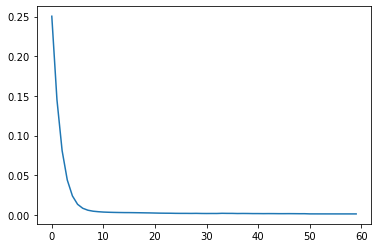

<Figure size 432x288 with 0 Axes>

In [4]:
trainer.train(begin_epoch=0)

In [ ]:
np.load = np_load_old